In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# compression = 'gzip'
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')
accepted = accepted.sample(frac=0.5, random_state=1)

rejected = pd.read_csv('rejected_2007_to_2018Q4.csv')
pd.set_option("display.max_columns", None)
accepted.head()

/tmp/ipykernel_69/2644162216.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1557444,132555889,NaN,11000.0,11000.0,11000.0,36 months,10.90,359.61,B,B4,Heavy Equipment Operator,8 years,RENT,36000.0,Source Verified,May-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,169xx,PA,16.10,0.0,Apr-2008,675.0,679.0,2.0,NaN,NaN,22.0,0.0,15093.0,40.1,24.0,w,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,0.0,0.0,0.0,Mar-2019,359.61,Apr-2019,Mar-2019,669.0,665.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,15093.0,3.0,0.0,0.0,0.0,NaN,0.0,NaN,3.0,8.0,2331.0,40.0,37600.0,0.0,0.0,2.0,8.0,686.0,13699.0,47.9,0.0,0.0,NaN,120.0,2.0,2.0,0.0,4.0,NaN,1.0,NaN,0.0,12.0,14.0,13.0,14.0,0.0,22.0,24.0,14.0,22.0,0.0,0.0,0.0,3.0,100.0,38.5,0.0,0.0,37600.0,15093.0,26300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1089926,69743499,NaN,12000.0,12000.0,12000.0,36 months,6.99,370.48,A,A3,RN,9 years,MORTGAGE,86000.0,Not Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.84,0.0,Apr-2000,685.0,689.0,1.0,35.0,NaN,19.0,0.0,10032.0,30.0,38.0,w,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,0.0,0.0,0.0,Jan-2019,370.09,NaN,Mar-2019,674.0,670.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,234402.0,1.0,4.0,1.0,1.0,5.0,22333.0,61.0,0.0,2.0,1772.0,30.0,33005.0,0.0,0.0,2.0,3.0,12336.0,2202.0,41.0,0.0,0.0,153.0,189.0,19.0,5.0,1.0,32.0,36.0,2.0,35.0,0.0,3.0,14.0,9.0,10.0,11.0,14.0,26.0,12.0,19.0,NaN,0.0,0.0,1.0,95.0,66.7,0.0,0.0,2886

In [3]:
(accepted['loan_amnt'] != accepted['funded_amnt']).sum()

1047

In [4]:
rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [5]:
print('accepted shape: ', accepted.shape)
print('rejected shape: ', rejected.shape)

accepted shape:  (1130350, 151)
rejected shape:  (27648741, 9)


In [6]:
accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130327e+06,1.129477e+06,1.130310e+06,1.130329e+06,1.130329e+06,1.130309e+06,551240.000000,179611.000000,1.130310e+06,1.130310e+06,1.130329e+06,1.129425e+06,1.130310e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130329e+06,1.130256e+06,290466.000000,1130329.0,6.020900e+04,60208.000000,1.130310e+06,1.095184e+06,1.095184e+06,697363.000000,697364.000000,697364.000000,697364.000000,675324.000000,6.973640e+05,595957.000000,697364.000000,697364.000000,6.973640e+05,697248.000000,1.095184e+06,697364.000000,697363.000000,697363.000000,1.105308e+06,1.095144e+06,1.092872e+06,1.092264e+06,1.130256e+06,1.130310e+06,1.060673e+06,1.095183e+06,1.095183e+06,1.095184e+06,1.105308e+06,1.093658e+06,260091.000000,982835.000000,370473.000000,1.095184e+06,1.095184e+06,1.095184e+06,1.100986e+06,1.095184e+06,1.095184e+06,1.095184e+06,1.095183e+06,1.095184e+06,1.100986e+06,1.053484e+06,1.095184e+06,1.095184e+06,1.095184e+06,1.095105e+06,1.092648e+06,1.129626e+06,1.130276e+06,1.095184e+06,1.105308e+06,1.105308e+06,1.095184e+06,5.392700e+04,53928.000000,53928.000000,53928.000000,53928.000000,53928.000000,53008.000000,53928.000000,53928.000000,53928.000000,53928.000000,17971.000000,5500.0,5500.000000,5500.0,5500.000000,4323.000000,5500.000000,5500.000000,17061.000000,17061.000000,17061.000000
mean,NaN,1.504977e+04,1.504456e+04,1.502602e+04,1.309235e+01,4.459222e+02,7.800780e+04,1.882346e+01,3.068264e-01,6.985892e+02,7.025894e+02,5.772360e-01,34.544911,72.314274,1.161257e+01,1.977581e-01,1.664790e+04,5.031627e+01,2.416714e+01,4.209930e+03,4.209004e+03,1.208335e+04,1.206498e+04,9.505896e+03,2.432058e+03,1.524667e+00,1.438678e+02,2.399058e+01,3.426468e+03,6.876213e+02,6.755457e+02,1.821888e-02,44.150169,1.0,1.236512e+05,19.246788,4.208580e-03,2.304838e+02,1.423234e+05,0.933567,2.774372,0.676314,1.563739,21.211463,3.547172e+04,69.123269,1.289081,2.751959,5.801409e+03,57.009984,3.457540e+04,1.013257,1.479545,2.038691,4.522187e+00,1.353685e+04,1.1

In [7]:
rejected.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.764874e+07,9.151111e+06,2.764782e+07
mean,1.313324e+04,6.281721e+02,6.375113e-03
std,1.500964e+04,8.993679e+01,1.127368e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e+03,5.910000e+02,0.000000e+00
50%,1.000000e+04,6.370000e+02,0.000000e+00
75%,2.000000e+04,6.750000e+02,0.000000e+00
max,1.400000e+06,9.900000e+02,2.000000e+00


In [8]:
accepted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130350 entries, 1557444 to 242451
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 1.3+ GB


In [9]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [10]:
accepted.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [11]:
accepted.dtypes.value_counts()

float64    113
object      38
dtype: int64

In [12]:
rejected.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

In [13]:
rejected.dtypes.value_counts()

object     6
float64    3
dtype: int64

In [14]:
categorical = [feature for feature in accepted.columns if accepted[feature].dtype == "O"]
categorical

['id',
 'term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date']

In [15]:
categorical = [feature for feature in rejected.columns if rejected[feature].dtype == "O"]
categorical

['Application Date',
 'Loan Title',
 'Debt-To-Income Ratio',
 'Zip Code',
 'State',
 'Employment Length']

In [16]:
accepted.isnull().sum().sort_values(ascending=False)

member_id                                     1130350
orig_projected_additional_accrued_interest    1126027
hardship_end_date                             1124850
hardship_start_date                           1124850
hardship_type                                 1124850
                                               ...   
revol_bal                                          21
fico_range_high                                    21
fico_range_low                                     21
addr_state                                         21
id                                                  0
Length: 151, dtype: int64

In [17]:
rejected.isnull().sum().sort_values(ascending=False)

Risk_Score              18497630
Employment Length         951355
Loan Title                  1303
Policy Code                  918
Zip Code                     293
State                         22
Amount Requested               0
Application Date               0
Debt-To-Income Ratio           0
dtype: int64

In [18]:
((accepted.isnull().sum()/len(accepted))*100).sort_values(ascending=False)

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617552
hardship_end_date                              99.513425
hardship_start_date                            99.513425
hardship_type                                  99.513425
                                                 ...    
revol_bal                                       0.001858
fico_range_high                                 0.001858
fico_range_low                                  0.001858
addr_state                                      0.001858
id                                              0.000000
Length: 151, dtype: float64

In [19]:
accepted = accepted.dropna( axis=1, thresh=len(accepted)*0.5)
print('accepted shape after dropping: ', accepted.shape)

accepted shape after dropping:  (1130350, 107)


In [20]:
rejected = rejected.dropna( axis=1, thresh=len(rejected)*0.5)
print('rejected shape after dropping: ', rejected.shape)

rejected shape after dropping:  (27648741, 8)


#### remove unique id and url for each data point to prevent overfitting

In [21]:
accepted = accepted.drop(['id', 'url'], axis=1)

In [22]:
accepted.dtypes.value_counts()

float64    83
object     22
dtype: int64

In [23]:
rejected.dtypes.value_counts()

object     6
float64    2
dtype: int64

### loan_status

In [24]:
loan_status_dummy = pd.get_dummies(accepted['loan_status'], drop_first=True)
# loan_status_dummy.head()
accepted = pd.concat([accepted, loan_status_dummy], axis=1)#(drop_first=True) it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.
accepted.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
1557444,11000.0,11000.0,11000.0,36 months,10.90,359.61,B,B4,Heavy Equipment Operator,8 years,RENT,36000.0,Source Verified,May-2018,Current,n,credit_card,Credit card refinancing,169xx,PA,16.10,0.0,Apr-2008,675.0,679.0,2.0,22.0,0.0,15093.0,40.1,24.0,w,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,0.0,0.0,0.0,Mar-2019,359.61,Mar-2019,669.0,665.0,0.0,1.0,Individual,0.0,0.0,15093.0,3.0,0.0,0.0,0.0,NaN,0.0,NaN,3.0,8.0,2331.0,40.0,37600.0,0.0,0.0,2.0,8.0,686.0,13699.0,47.9,0.0,0.0,NaN,120.0,2.0,2.0,0.0,4.0,1.0,0.0,12.0,14.0,13.0,14.0,0.0,22.0,24.0,14.0,22.0,0.0,0.0,0.0,3.0,100.0,38.5,0.0,0.0,37600.0,15093.0,26300.0,0.0,N,DirectPay,N,1,0,0,0,0,0,0,0
1089926,12000.0,12000.0,12000.0,36 months,6.99,370.48,A,A3,RN,9 years,MORTGAGE,86000.0,Not Verified,Jan-2016,Fully Paid,n,debt_consolidation,Debt consolidation,773xx,TX,19.84,0.0,Apr-2000,685.0,689.0,1.0,19.0,0.0,10032.0,30.0,38.0,w,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,0.0,0.0,0.0,Jan-2019,370.09,Mar-2019,674.0,670.0,0.0,1.0,Individual,0.0,0.0,234402.0,1.0,4.0,1.0,1.0,5.0,22333.0,61.0,0.0,2.0,1772.0,30.0,33005.0,0.0,0.0,2.0,3.0,12336.0,2202.0,41.0,0.0,0.0,153.0,189.0,19.0,5.0,1.0,32.0,2.0,0.0,3.0,14.0,9.0,10.0,11.0,14.0,26.0,12.0,19.0,NaN,0.0,0.0,1.0,95.0,66.7,0.0,0.0,288684.0,32365.0,6605.0,36393.0,N,Cash,N,0,0,0,0,1,0,0,0
71683,5000.0,5000.0,5000.0,36 months,12.05,166.20,C,C1,Product Picker,1 year,RENT,25000.0,Source Verified,Nov-2015,Fully Paid,n,debt_consolidation,Debt consolidation,490xx,MI,16.95,0.0,Jul-2010,660.0,664.0,0.0,6.0,0.0,1312.0,30.5,10.0,w,0.00,0.00,5777.950141,5777.95,5000.00,777.95,0.0,0.0,0.0,Jul-2017,2625.17,Mar-2019,654.0,650.0,0.0,1.0,Individual,0.0,6864.0,20751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,NaN,NaN,NaN,7.0,3459.0,NaN,NaN,0.0,0.0,38.0,64.0,16.0,8.0,0.0,NaN,13.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,5.0,1.0,6.0,0.0,0.0,0.0,3.0,90.0,NaN,0.0,0.0,25139.0,20751.0,0.0,20839.0,N,Cash,N,0,0,0,0,1,0,0,0
356146,20000.0,20000.0,19975.0,36 months,15.61,699.30,D,D1,Graphic Artist,8 years,RENT,40000.0,Verified,Apr-2015,Fully Paid,n,credit_card,Credit card refinancing,900xx,CA,34.56,0.0,Feb-1987,705.0,709.0,0.0,10.0,0.0,40605.0,60.9,17.0,f,0.00,0.00,25154.877245,25123.43,20000.00,5154.88,0.0,0.0,0.0,Mar-2018,1396.02,Mar-2018,794.0,790.0,0.0,1.0,Individual,0.0,0.0,40789.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [25]:
list(loan_status_dummy.columns)

['Current',
 'Default',
 'Does not meet the credit policy. Status:Charged Off',
 'Does not meet the credit policy. Status:Fully Paid',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Late (31-120 days)']

##### Current: Loan is up to date on all outstanding payments.
##### In Grace Period: Loan is past due but within the 15-day grace period.
##### Late (16-30): Loan has not been current for 16 to 30 days.
##### Late (31-120): Loan has not been current for 31 to 120 days.
##### Fully paid: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
##### Default: Loan has not been current for an extended period of time.
##### Charged Off: Loan for which there is no longer a reasonable expectation of further payments.


The loans with the statuses Current and Fully Paid are definitely considered good. The loans with the statuses In Grace Period can be considered good or not depending on strictness of the investor. All the other statuses are considered as bad loans.

In [26]:
print('Good Loans: ', len(accepted[(accepted['loan_status'] == 'Current') | (accepted['loan_status'] == 'Fully Paid') | (accepted['loan_status'] == 'In Grace Period')]) / len(accepted)) 

Good Loans:  0.8686141460609546


Note that this dataset is highly imbalanced.

In [27]:
accepted_correlations = accepted.corr()
loan_status_correlations = accepted_correlations.drop(list(loan_status_dummy.columns), axis=1).loc[list(loan_status_dummy.columns)]
loan_status_correlations

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
Current,0.076337,0.076803,0.078007,-0.053605,0.028739,0.017078,0.044030,-0.018047,0.096667,0.096666,-0.119303,0.004626,-0.039005,0.021993,-0.075861,-0.080240,0.670992,0.670928,-0.330249,-0.329134,-0.379834,0.002237,-0.043719,-0.153207,-0.145394,-0.388874,0.202827,0.189329,0.007319,NaN,-0.015811,-0.001875,0.012038,-0.084064,-0.003241,-0.086215,-0.091928,0.050015,-0.008101,-0.078058,-0.072988,-0.082862,0.041117,-0.049356,0.060054,-0.046955,-0.038038,-0.095798,-0.068828,0.005819,0.091110,-0.087812,-0.007942,-0.004979,-0.000151,0.002697,0.063275,0.058920,-0.067311,0.040493,0.067336,-0.008860,0.015153,-0.007493,0.015467,-0.091468,-0.025090,-0.007833,-0.086433,-0.007397,-0.002115,-0.008787,-0.012690,-0.014929,-0.069850,-0.003014,-0.092183,-0.022062,-0.018048,0.027627,0.031121,0.084760,0.039911
Default,0.001479,0.001481,0.001487,0.001142,0.001988,0.000748,0.000035,-0.000667,0.001445,0.001445,-0.000023,-0.000739,0.000977,-0.000980,-0.001076,-0.001371,0.004037,0.004038,-0.000760,-0.000753,-0.001365,0.001576,0.010331,-0.000676,-0.000641,-0.001534,-0.005086,-0.003089,0.002890,NaN,-0.000210,-0.000019,-0.000105,0.000261,0.000551,0.000875,0.001441,-0.000849,0.001970,-0.000291,-0.001072,-0.000804,-0.000658,0.000136,-0.000850,-0.000040,-0.000802,0.002203,-0.000105,0.000254,-0.000073,-0.000894,-0.000287,-0.000061,-0.001319,-0.001520,0.000550,0.000439,-0.001306,-0.000293,-0.001280,-0.001135,-0.000051,-0.000892,-0.000071,0.000042,-0.000477,-0.001063,-0.001277,-0.000861,-0.000758,-0.000087,-0.000181,-0.000082,-0.000426,0.000617,-0.001718,0.000141,0.001537,-0.000043,0.001015,-0.000449,0.002337
Does not meet the credit policy. Status:Charged Off,-0.011239,-0.011813,-0.018806,0.005816,-0.009823,-0.001222,-0.006168,-0.001578,-0.010480,-0.010479,0.084868,-0.006131,-0.002335,0.009716,0.003216,-0.003439,-0.010692,-0.010691,-0.013439,-0.016841,-0.014732,-0.007432,0.004783,0.012532,0.016088,-0.009738,-0.018733,-0.019436,-0.002210,NaN,-0.001109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001499,-0.000324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000646,-0.002272,NaN,NaN,NaN,NaN
Does not meet the credit policy. Status:Fully Paid,-0.020083,-0.020602,-0.028378,0.005286,-0.017713,-0.001569,-0.010262,-0.002739,-0.011128,-0.011128,0.115032,-0.007483,-0.005558,0.012596,0.002314,-0.003084,-0.017222,-0.017220,-0.004531,-0.013199,-0.002753,-0.006596,0.003337,-0.005768,-0.005474,-0.006375,-0.004494,-0.003004,-0.003547,NaN,-0.000515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002406,-0.000519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004405,-0.003643,NaN,NaN,NaN,NaN
Fully Paid,-0.093986,-0.094331,-

In [28]:
rejected_correlations = rejected.corr()
rejected_correlations

,Amount Requested,Policy Code
Amount Requested,1.000000,0.036957
Policy Code,0.036957,1.000000


/tmp/ipykernel_69/423330912.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/2)][i%2].set_xticklabels(list(loan_status_correlations.loc[feature].sort_values().index), rotation=90)
/tmp/ipykernel_69/423330912.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/2)][i%2].set_xticklabels(list(loan_status_correlations.loc[feature].sort_values().index), rotation=90)
/tmp/ipykernel_69/423330912.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/2)][i%2].set_xticklabels(list(loan_status_correlations.loc[feature].sort_values().index), rotation=90)
/tmp/ipykernel_69/423330912.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/2)][i%2].set_xticklabels(list(loan_status_correlations.loc[feature].sort_values().index), rotation=90)
/tmp/ipykernel_69/423330912.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator

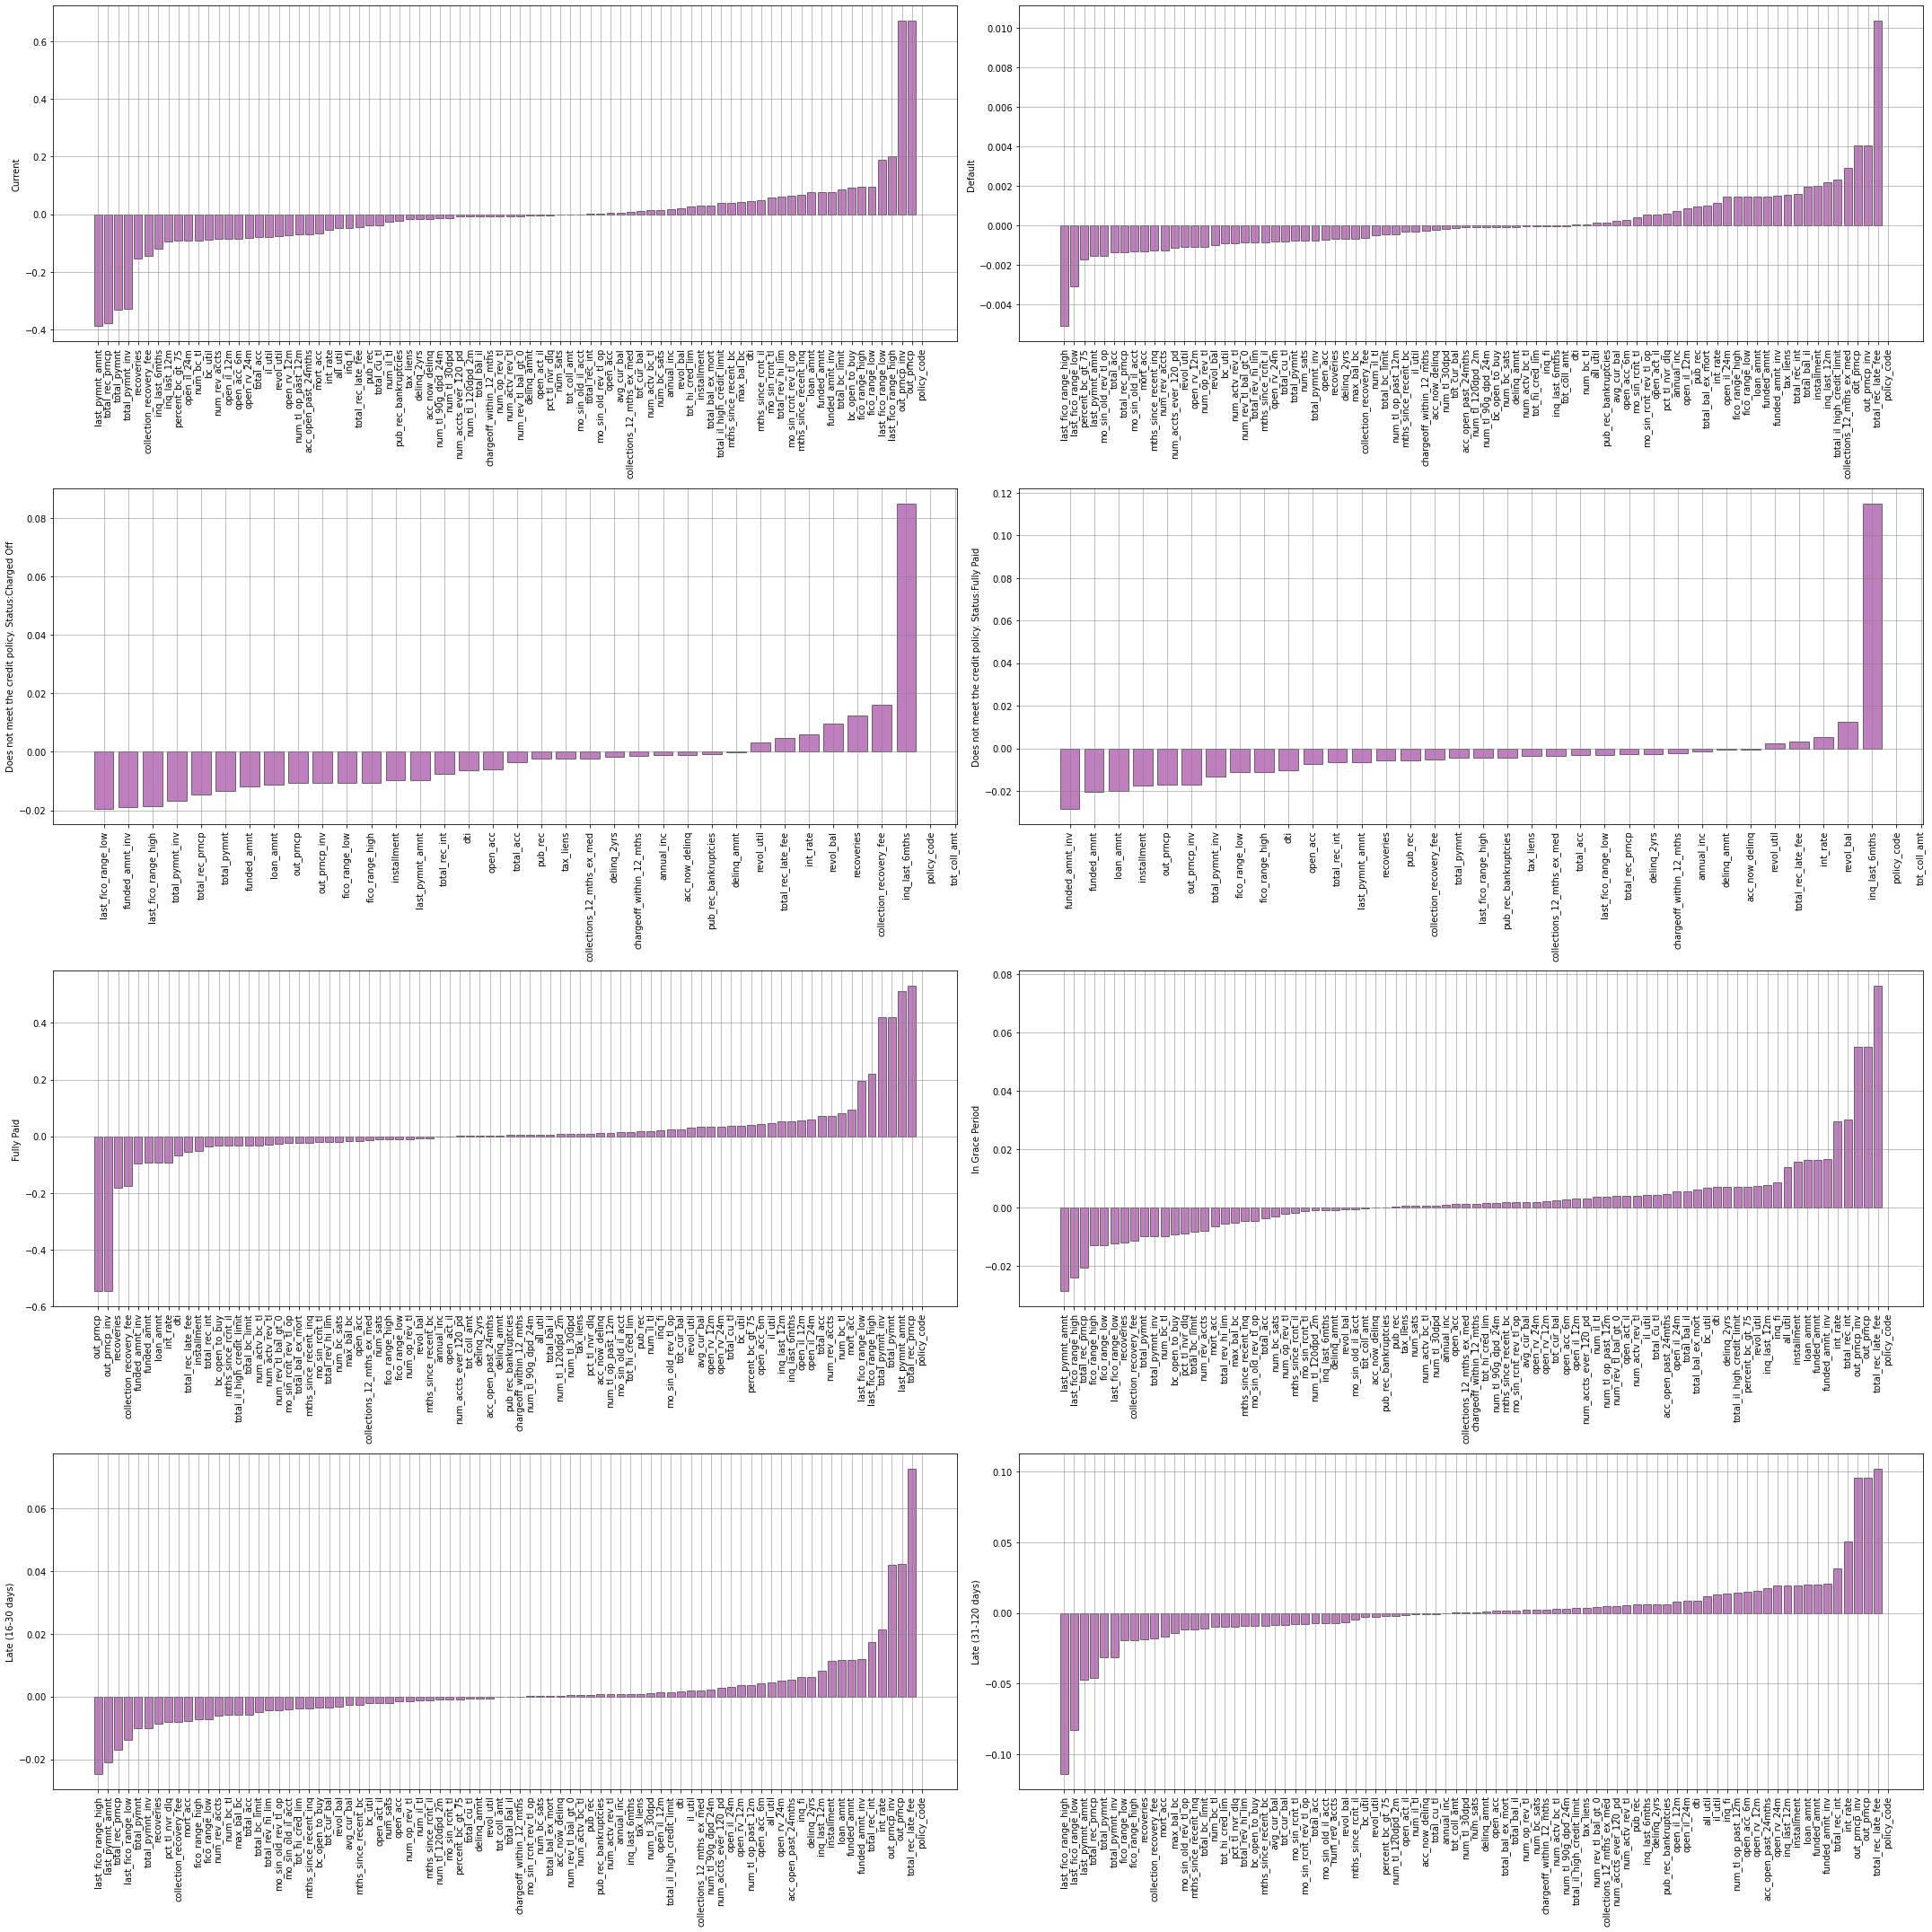

In [30]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(30, 30))
for i, feature in enumerate(list(loan_status_dummy.columns)):
    ax[int(i/2)][i%2].grid(True, linewidth=0.5, color='gray', linestyle='-')
    ax[int(i/2)][i%2].bar(list(loan_status_correlations.loc[feature].sort_values().index), loan_status_correlations.loc[feature].sort_values(), align='center', alpha=0.5, edgecolor='black', color='purple')
    ax[int(i/2)][i%2].set_xticklabels(list(loan_status_correlations.loc[feature].sort_values().index), rotation=90)
    ax[int(i/2)][i%2].set_ylabel(feature)
fig.tight_layout()

fico_range_low              fico_range_high               1.000000
fico_range_high             fico_range_low                1.000000
out_prncp                   out_prncp_inv                 0.999999
out_prncp_inv               out_prncp                     0.999999
funded_amnt                 loan_amnt                     0.999759
loan_amnt                   funded_amnt                   0.999759
total_pymnt                 total_pymnt_inv               0.999390
total_pymnt_inv             total_pymnt                   0.999390
funded_amnt                 funded_amnt_inv               0.999310
funded_amnt_inv             funded_amnt                   0.999310
loan_amnt                   funded_amnt_inv               0.999015
funded_amnt_inv             loan_amnt                     0.999015
num_sats                    open_acc                      0.998977
open_acc                    num_sats                      0.998977
num_rev_tl_bal_gt_0         num_actv_rev_tl               0.98

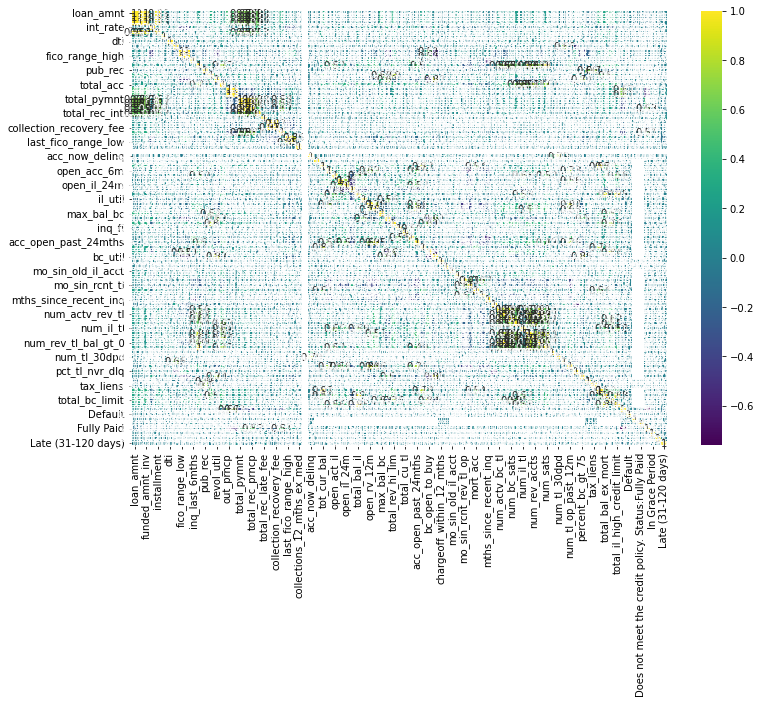

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(accepted_correlations, annot=True, cmap='viridis')

corr_pairs = accepted_correlations.abs().unstack().sort_values(kind="quicksort", ascending=False).dropna()
indexes = np.array(list(corr_pairs[(corr_pairs > 0.9) & (corr_pairs < 1)].index.get_level_values(0)))
corr_pairs[(corr_pairs > 0.9) & (corr_pairs < 1)]
# print(indexes[::2])
# print(indexes[1::2])

<AxesSubplot:>

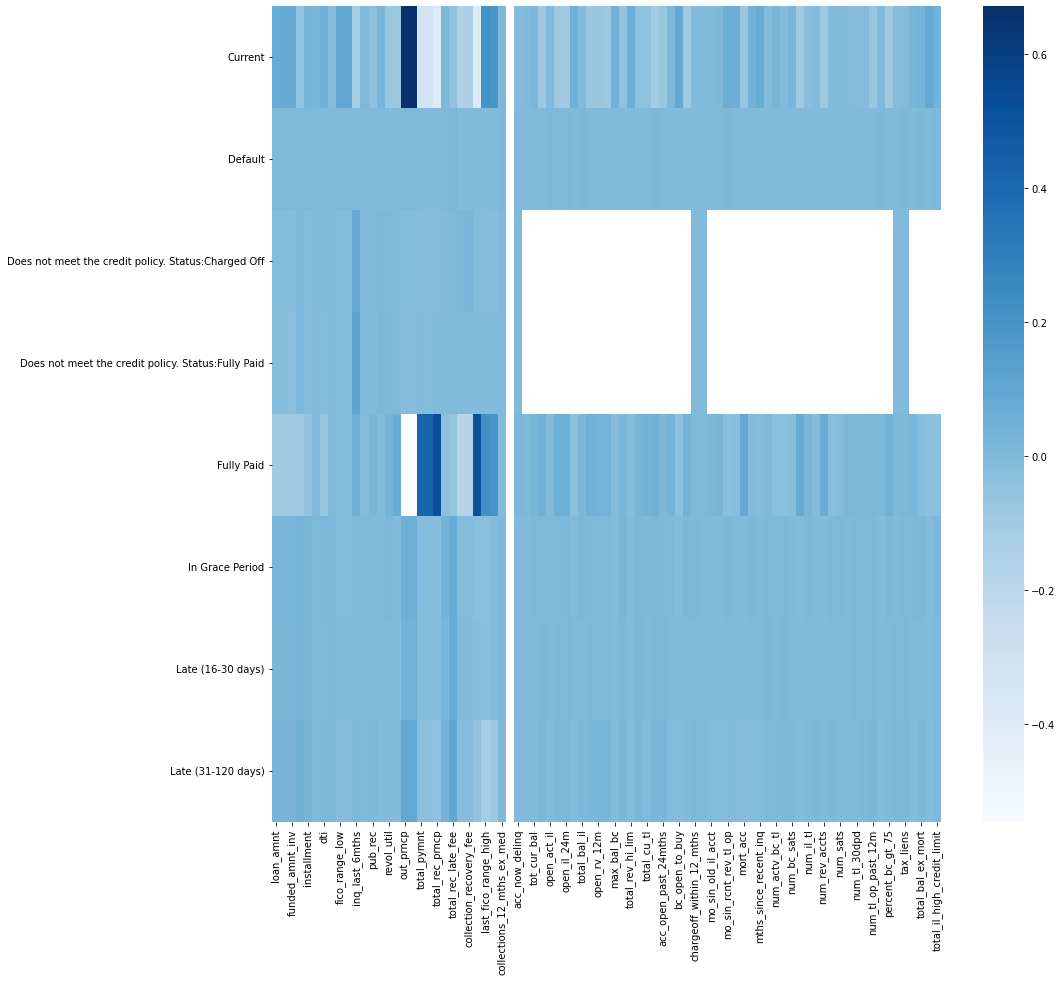

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(loan_status_correlations,cbar=True,cmap='Blues')

<AxesSubplot:>

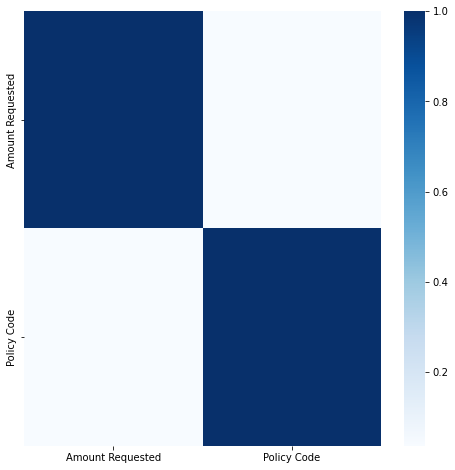

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(rejected_correlations,cbar=True,cmap='Blues')

In [34]:
accepted['loan_status'].value_counts()

Fully Paid                                             537961
Current                                                439647
Charged Off                                            134113
Late (31-120 days)                                      10721
In Grace Period                                          4230
Late (16-30 days)                                        2231
Does not meet the credit policy. Status:Fully Paid       1019
Does not meet the credit policy. Status:Charged Off       393
Default                                                    14
Name: loan_status, dtype: int64

In [35]:
accepted['addr_state'].value_counts()

CA    157123
NY     93019
TX     92805
FL     81193
IL     45575
NJ     41502
PA     38614
OH     37469
GA     37261
VA     31457
NC     31415
MI     29444
MD     27020
AZ     26840
MA     25986
CO     24075
WA     23679
MN     19786
IN     18648
CT     18062
MO     17953
TN     17716
NV     16316
WI     15012
SC     13992
AL     13665
OR     13264
LA     12910
KY     11042
OK     10220
KS      9485
AR      8547
UT      7560
MS      6324
NM      5976
NH      5621
HI      5274
RI      5000
WV      4163
NE      3952
MT      3272
DE      3238
AK      2652
DC      2634
ME      2522
VT      2515
WY      2353
SD      2276
ID      2149
ND      1750
IA         3
Name: addr_state, dtype: int64

In [36]:
inc_stats = accepted['annual_inc'].describe()
inc_stats

count    1.130327e+06
mean     7.800780e+04
std      1.288000e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

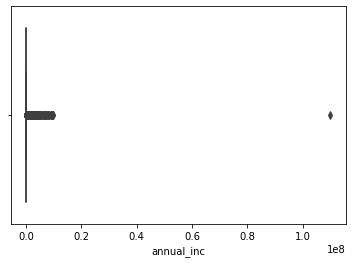

In [37]:
ax = sns.boxplot(x=accepted['annual_inc'])

In [38]:
lower_bound = inc_stats['25%'] - 1.5 * (inc_stats['75%'] - inc_stats['25%'])
upper_bound = inc_stats['75%'] + 1.5 * (inc_stats['75%'] - inc_stats['25%'])
print(lower_bound, upper_bound)

-24500.0 163500.0


In [39]:
accepted = accepted[accepted['annual_inc']  < upper_bound]
len(accepted)

1075354

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


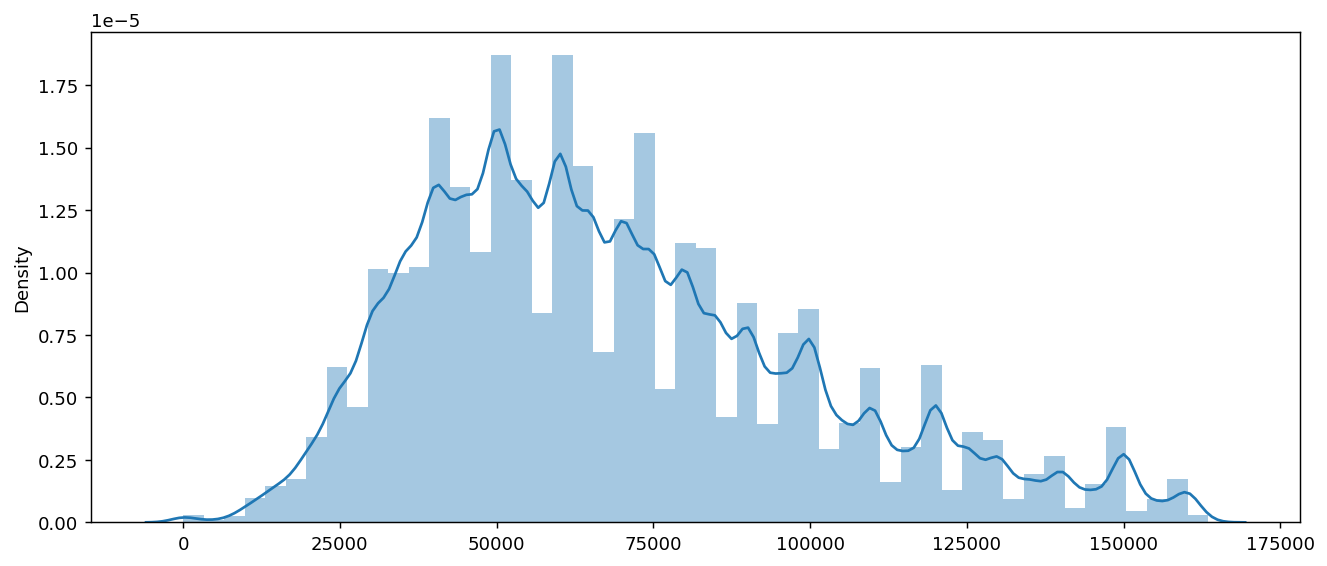

In [40]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=accepted['annual_inc']);

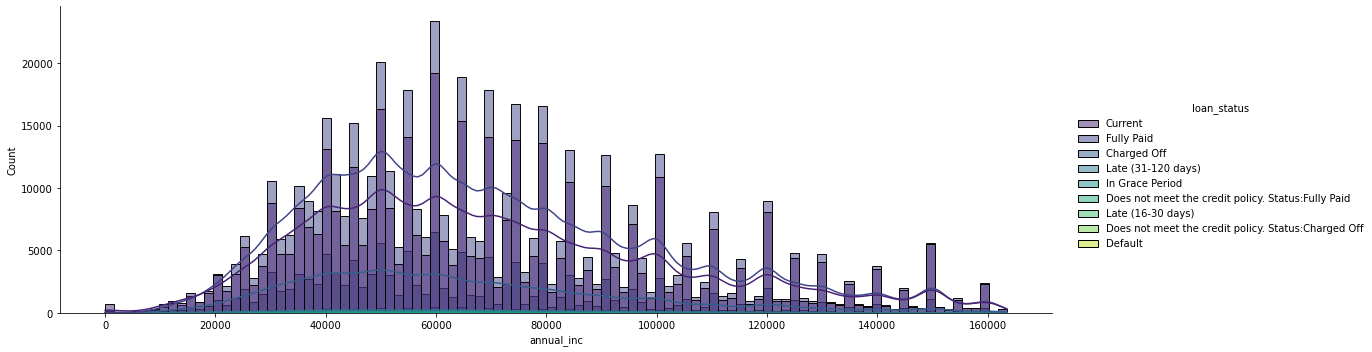

In [41]:
sns.displot(data=accepted, x='annual_inc', hue='loan_status', bins=100, height=5, aspect=3, kde=True, palette='viridis');

In [42]:
accepted.groupby('loan_status')['annual_inc'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,513145.0,69460.851848,31214.645238,0.0,45500.00,65000.0,88500.0,163472.0
Current,414591.0,70101.545820,32483.723446,0.0,45000.00,65000.0,90000.0,163400.0
Charged Off,129985.0,64783.007397,29740.973805,0.0,42743.75,60000.0,80000.0,163092.0
Late (31-120 days),10228.0,68184.329022,31663.111100,0.0,45000.00,63000.0,86000.0,163000.0
In Grace Period,3972.0,70408.463938,32141.409687,0.0,45000.00,65000.0,90000.0,163000.0
Late (16-30 days),2087.0,69917.096536,32049.600499,0.0,46222.50,65000.0,90000.0,162000.0
Does not meet the credit policy. Status:Fully Paid,965.0,60736.001751,31682.865044,1896.0,38000.00,55000.0,80000.0,160000.0
Does not meet the credit policy. Status:Charged Off,369.0,57724.787317,32322.775541,2000.0,36000.00,50000.0,75000.0,160000.0
Default,12.0,72966.666667,26341.371999,35000.0,57500.00,70000.0,89400.0,120000.0


### loan_amnt

In [43]:
accepted['loan_amnt'].describe()

count    1.075354e+06
mean     1.456064e+04
std      8.860709e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [44]:
accepted.groupby('loan_status')['loan_amnt'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,513145.0,13693.882723,8350.330923,500.0,7200.0,12000.0,19025.00,40000.0
Current,414591.0,15344.772559,9407.975292,1000.0,8000.0,13200.0,20000.00,40000.0
Charged Off,129985.0,15278.106128,8601.649310,900.0,8850.0,14000.0,20000.00,40000.0
Late (31-120 days),10228.0,16497.949257,9450.898638,1000.0,10000.0,15000.0,23000.00,40000.0
In Grace Period,3972.0,17010.624371,9425.297207,1000.0,10000.0,15000.0,24000.00,40000.0
Late (16-30 days),2087.0,16849.029708,9614.022264,1000.0,10000.0,15000.0,24000.00,40000.0
Does not meet the credit policy. Status:Fully Paid,965.0,8568.730570,5948.413115,500.0,4000.0,7000.0,11750.00,25000.0
Does not meet the credit policy. Status:Charged Off,369.0,8785.772358,6086.844120,500.0,4500.0,7400.0,11500.00,25000.0
Default,12.0,15395.833333,8876.621704,1675.0,9450.0,15475.0,20006.25,30000.0


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


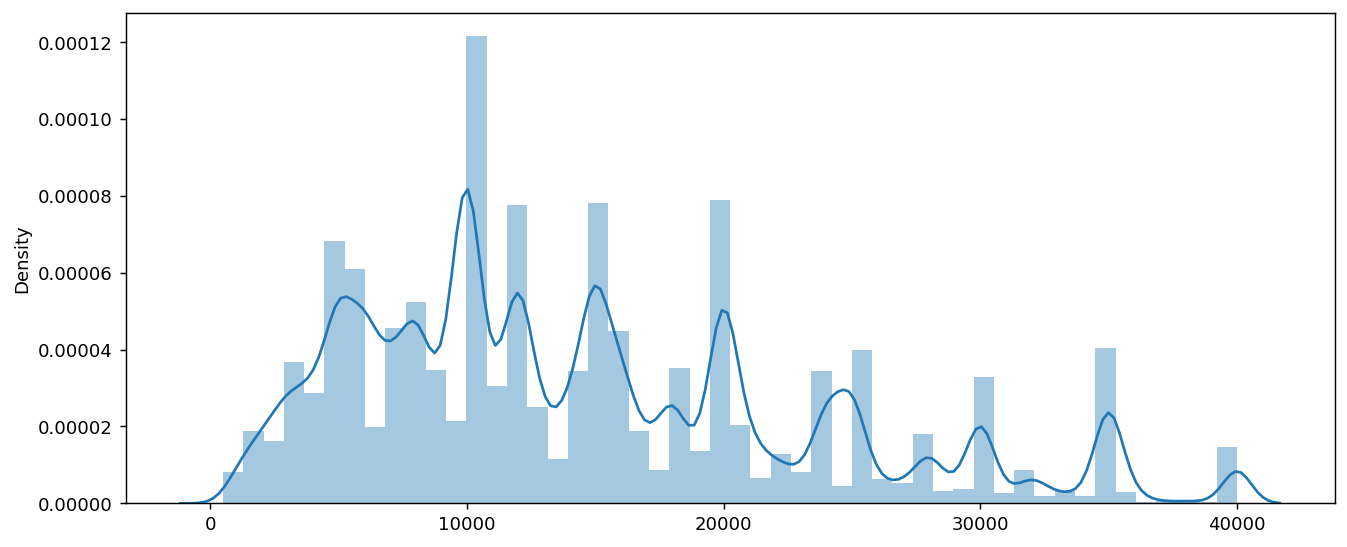

In [45]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=accepted['loan_amnt']);

#### In the loan amount distribution we can see spikes in even ten thousend dollar, so this is indicating that there are certain amounts that are basically standard loans.

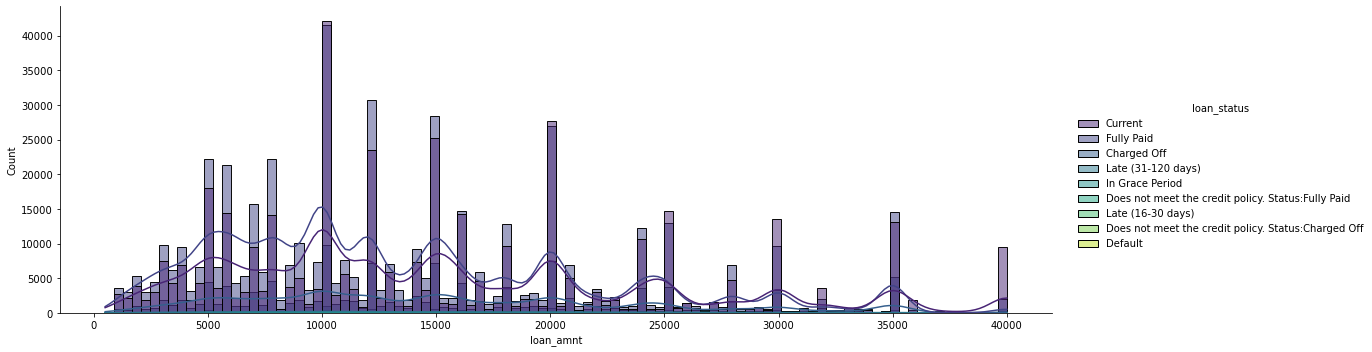

In [46]:
sns.displot(data=accepted, x='loan_amnt', hue='loan_status', bins=100, height=5, aspect=3, kde=True, palette='viridis');

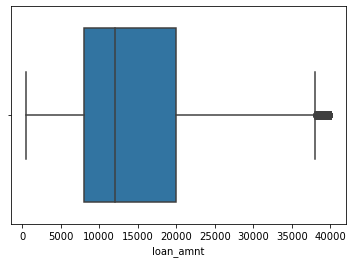

In [47]:
ax = sns.boxplot(x=accepted['loan_amnt'])

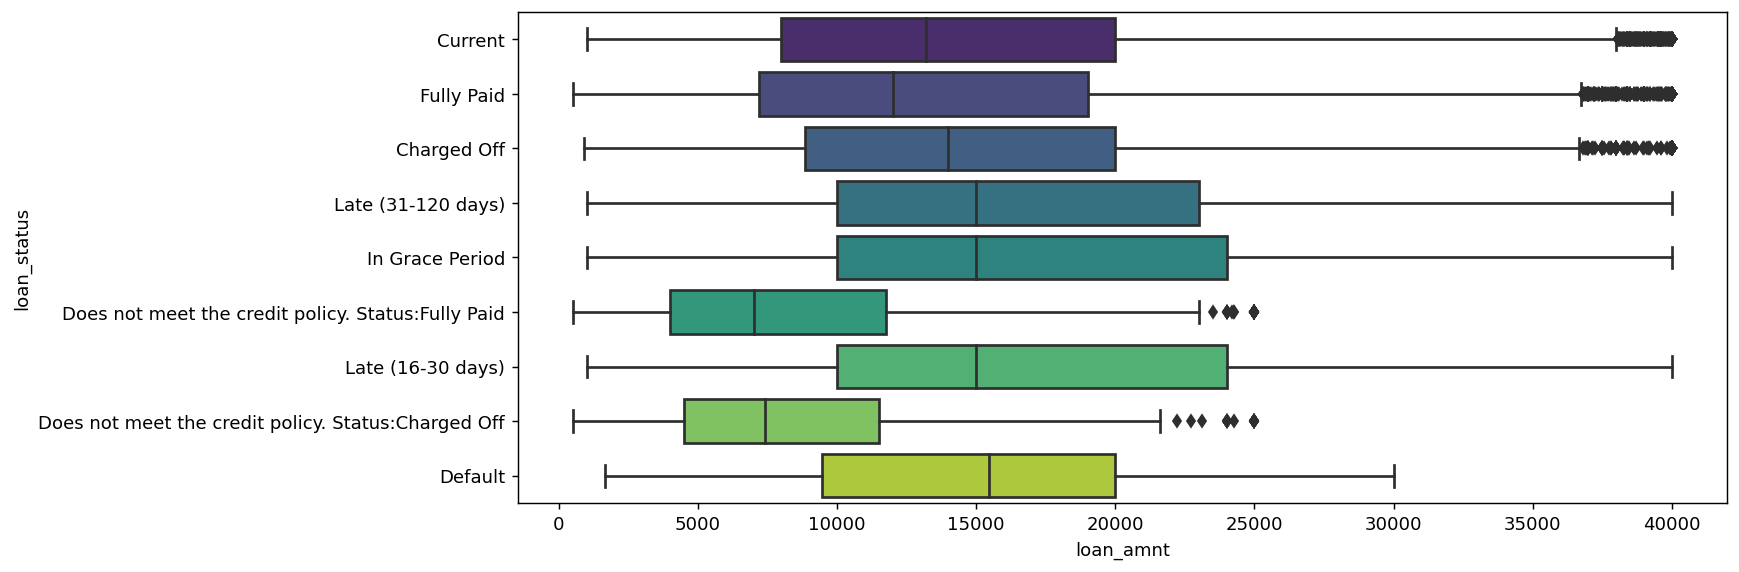

In [48]:
plt.figure(figsize=(12,5), dpi=130)
sns.boxplot(data=accepted, y='loan_status', x='loan_amnt', palette='viridis');

### emp_length

In [49]:
accepted['emp_length'].value_counts()

10+ years    353531
2 years       96291
< 1 year      90418
3 years       85879
1 year        71284
5 years       66294
4 years       65047
6 years       48476
7 years       43772
8 years       43664
9 years       37726
Name: emp_length, dtype: int64

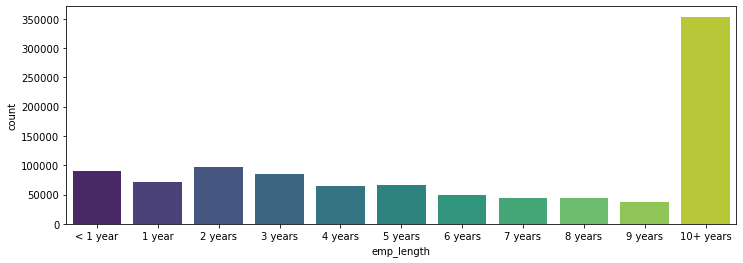

In [50]:
emp_length_order = [ '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=accepted,order=emp_length_order, palette='viridis');

In [51]:
status_emp_length_pcnt = accepted.groupby(['loan_status', 'emp_length']).size().unstack(fill_value=0).stack() / accepted.groupby(['loan_status']).size()

/tmp/ipykernel_69/1560468045.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_emp_length_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/1560468045.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_emp_length_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/1560468045.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_emp_length_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/1560468045.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_emp_length_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/1560468045.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_emp_length_pcnt[feature].i

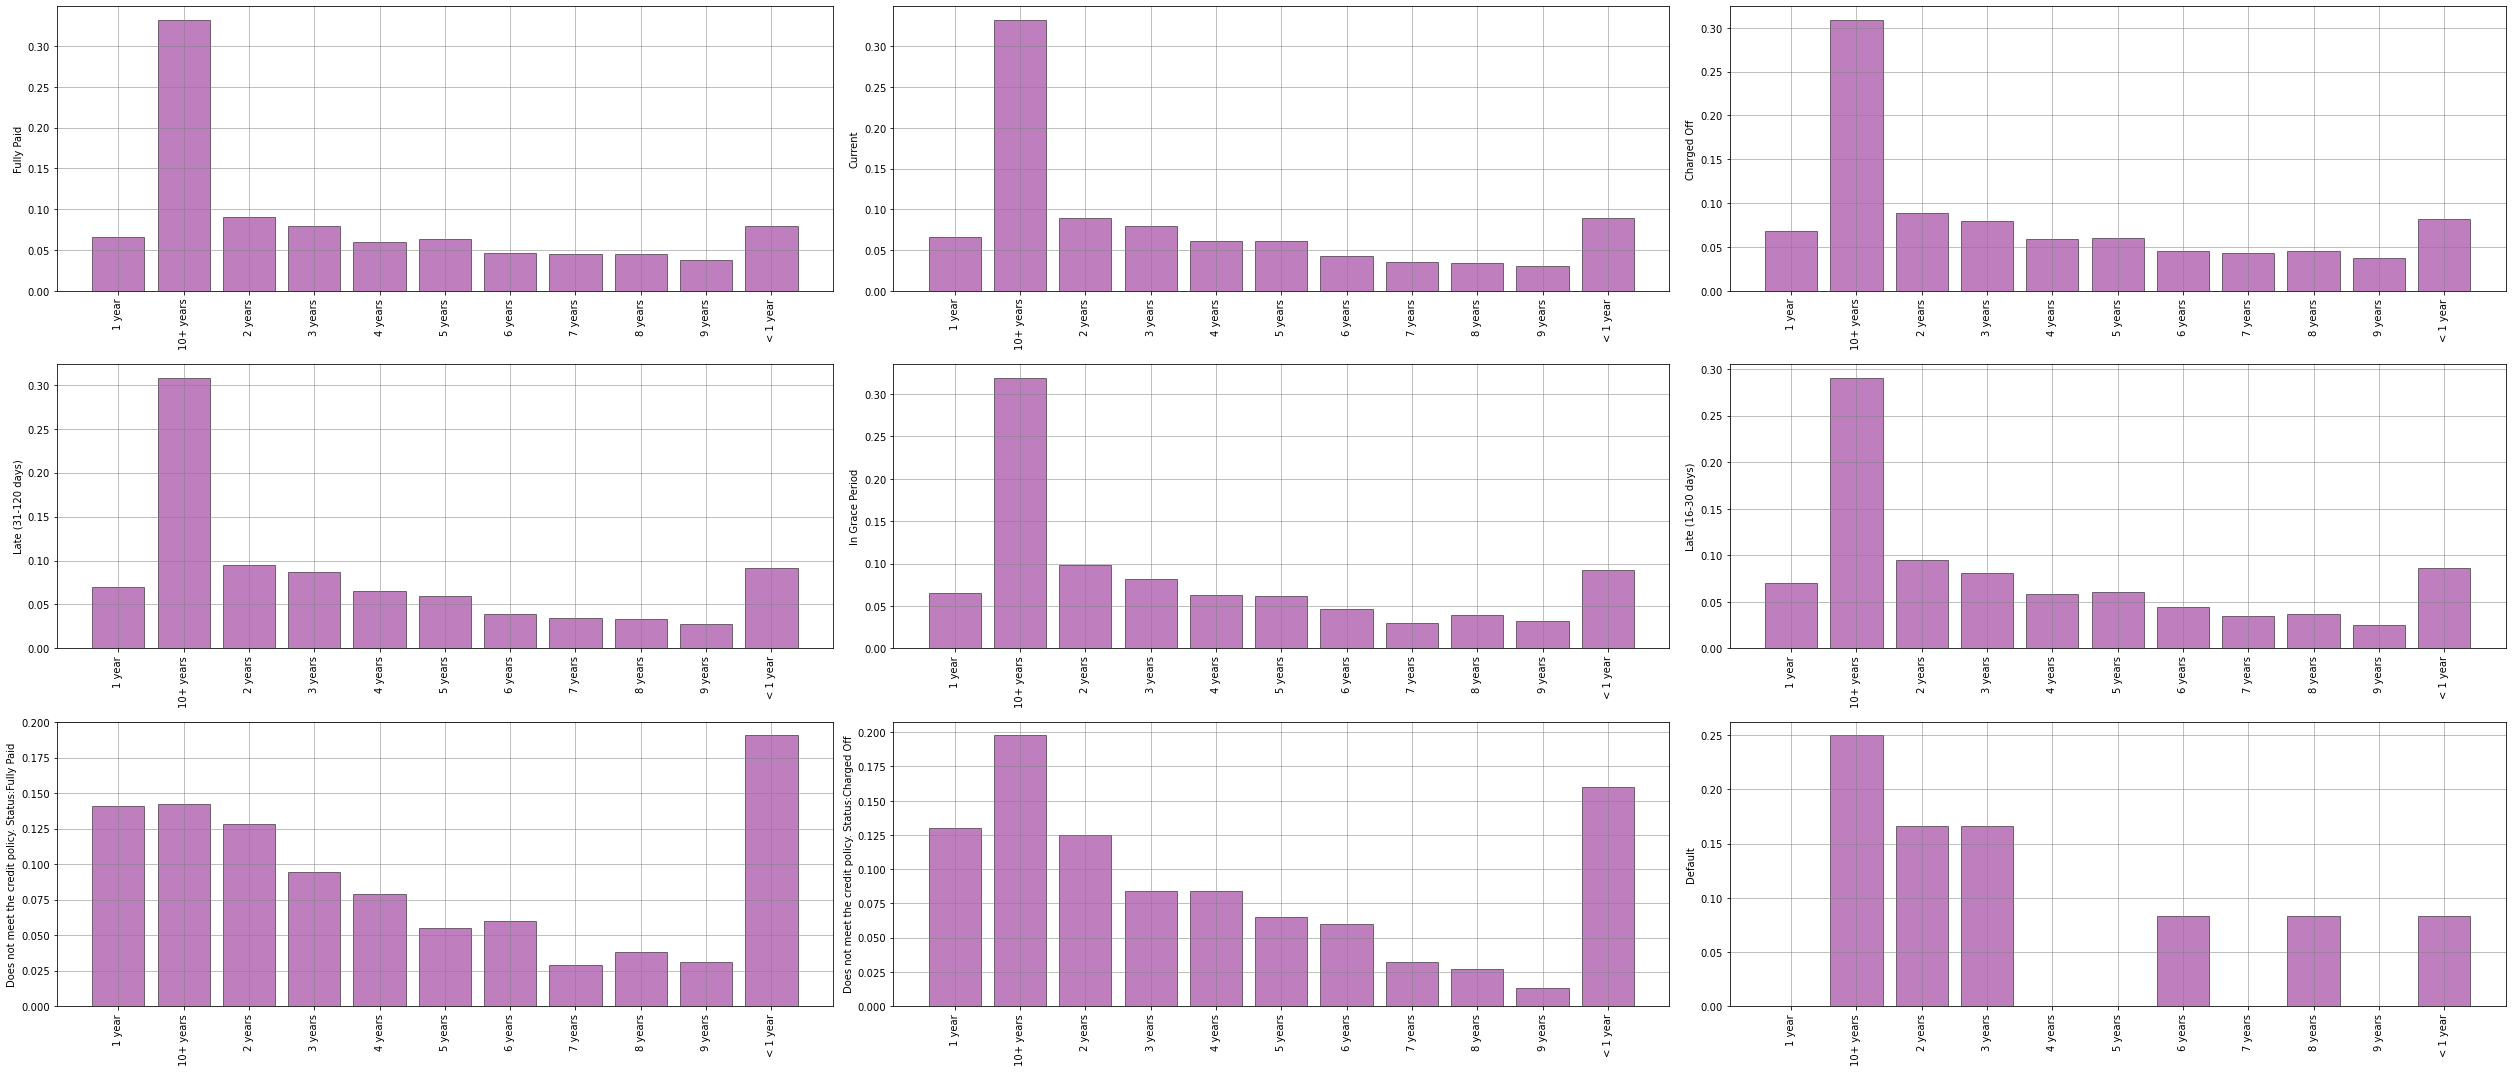

In [52]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(35, 15))
for i, feature in enumerate(list(accepted['loan_status'].value_counts().index)):
    ax[int(i/3)][i%3].grid(True, linewidth=0.5, color='gray', linestyle='-')
    ax[int(i/3)][i%3].bar(list(status_emp_length_pcnt[feature].index), status_emp_length_pcnt[feature], align='center', alpha=0.5, edgecolor='black', color='purple')
    ax[int(i/3)][i%3].set_xticklabels(list(status_emp_length_pcnt[feature].index), rotation=90)
    ax[int(i/3)][i%3].set_ylabel(feature)
fig.tight_layout()


In [53]:
for s in list(accepted.columns):
    if 'fico' in s:
        print(s)

fico_range_low
fico_range_high
last_fico_range_high
last_fico_range_low


In [54]:
accepted['fico_range_low'].describe()

count    1.075354e+06
mean     6.982152e+02
std      3.286651e+01
min      6.100000e+02
25%      6.750000e+02
50%      6.900000e+02
75%      7.150000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

In [55]:
accepted['fico_range_high'].describe()

count    1.075354e+06
mean     7.022154e+02
std      3.286735e+01
min      6.140000e+02
25%      6.790000e+02
50%      6.940000e+02
75%      7.190000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64

In [56]:
accepted['last_fico_range_low'].describe()

count    1.075354e+06
mean     6.746699e+02
std      1.119426e+02
min      0.000000e+00
25%      6.500000e+02
50%      6.950000e+02
75%      7.300000e+02
max      8.450000e+02
Name: last_fico_range_low, dtype: float64

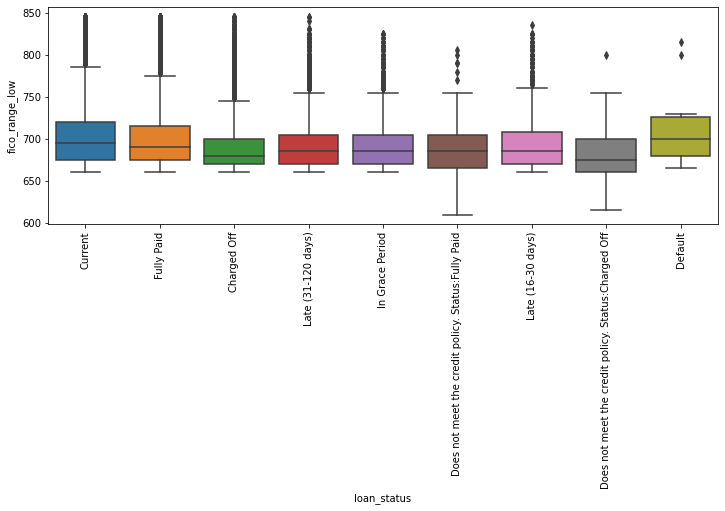

In [57]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="loan_status", y="fico_range_low", data=accepted)   
plt.xticks(rotation=90);

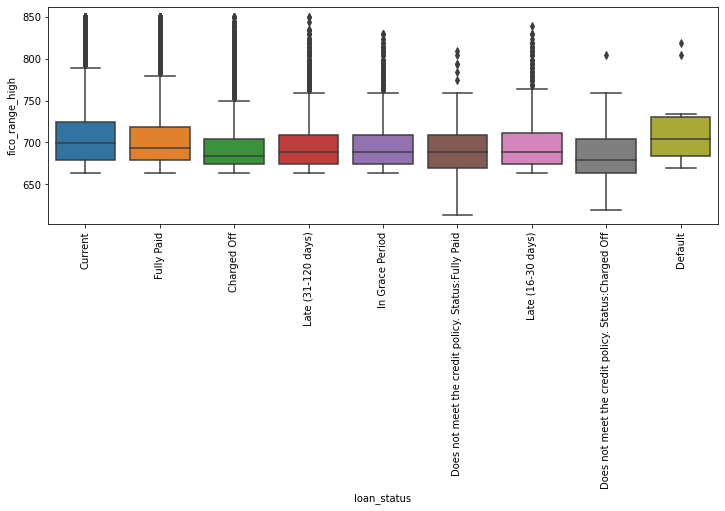

In [58]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="loan_status", y="fico_range_high", data=accepted)   
plt.xticks(rotation=90);

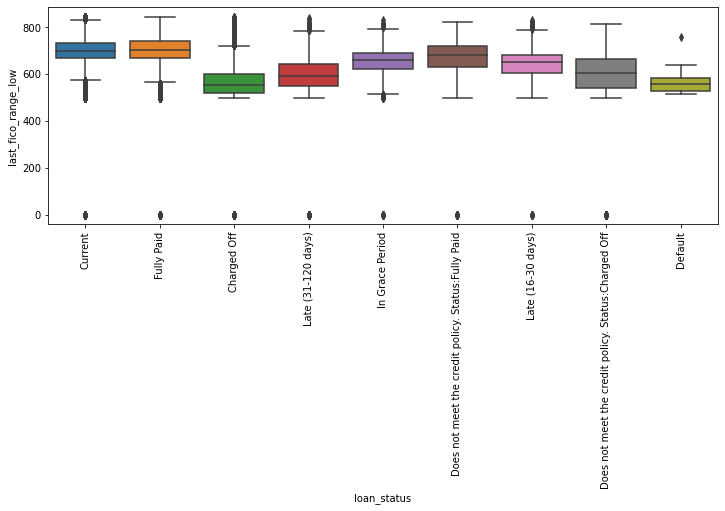

In [59]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="loan_status", y="last_fico_range_low", data=accepted)   
plt.xticks(rotation=90);

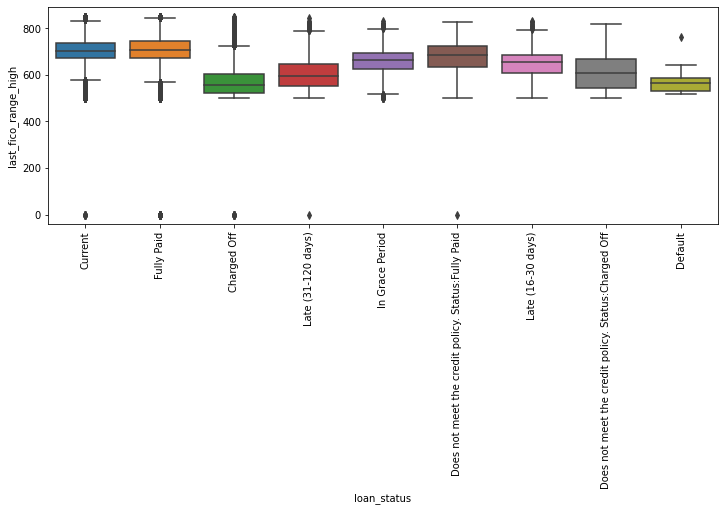

In [60]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="loan_status", y="last_fico_range_high", data=accepted)   
plt.xticks(rotation=90);

In [61]:
accepted['home_ownership'].value_counts()

MORTGAGE    518693
RENT        435024
OWN         121076
ANY            454
OTHER           86
NONE            21
Name: home_ownership, dtype: int64

In [62]:
status_home_own_pcnt = accepted.groupby(['loan_status', 'home_ownership']).size().unstack(fill_value=0).stack() / accepted.groupby(['loan_status']).size()
status_home_own_pcnt

loan_status                                          home_ownership
Charged Off                                          ANY               0.000223
                                                     MORTGAGE          0.422310
                                                     NONE              0.000031
                                                     OTHER             0.000092
                                                     OWN               0.111444
                                                     RENT              0.465900
Current                                              ANY               0.000738
                                                     MORTGAGE          0.477938
                                                     NONE              0.000000
                                                     OTHER             0.000000
                                                     OWN               0.119274
                                                    

/tmp/ipykernel_69/1135463860.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_home_own_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/1135463860.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_home_own_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/1135463860.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_home_own_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/1135463860.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_home_own_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/1135463860.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/3)][i%3].set_xticklabels(list(status_home_own_pcnt[feature].index), rot

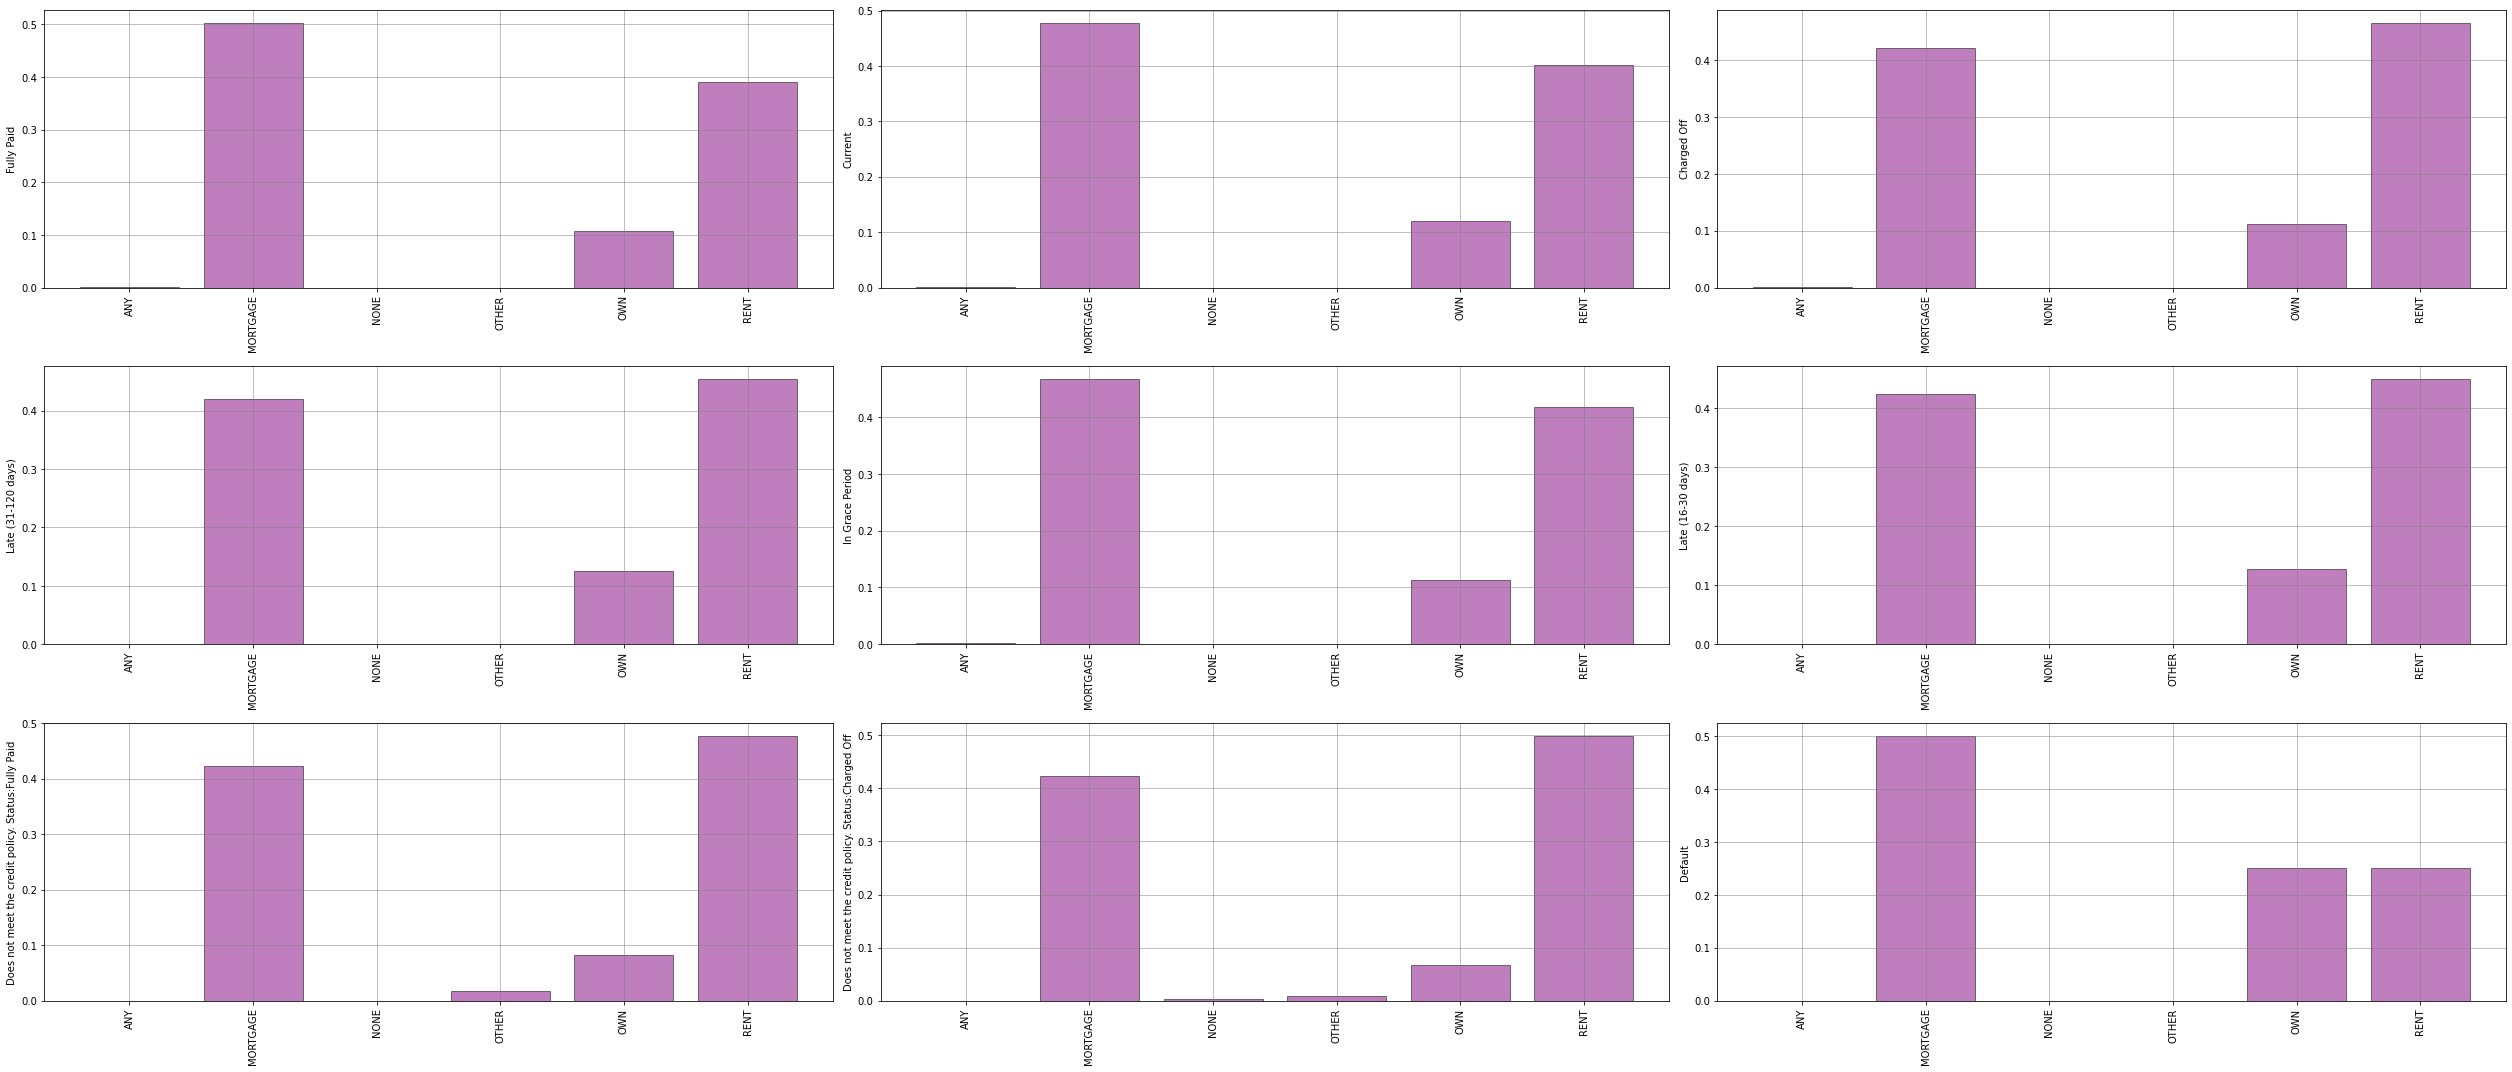

In [63]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(35, 15))
for i, feature in enumerate(list(accepted['loan_status'].value_counts().index)):
    ax[int(i/3)][i%3].grid(True, linewidth=0.5, color='gray', linestyle='-')
    ax[int(i/3)][i%3].bar(list(status_home_own_pcnt[feature].index), status_home_own_pcnt[feature], align='center', alpha=0.5, edgecolor='black', color='purple')
    ax[int(i/3)][i%3].set_xticklabels(list(status_home_own_pcnt[feature].index), rotation=90)
    ax[int(i/3)][i%3].set_ylabel(feature)
fig.tight_layout()

In [64]:
accepted['int_rate'].describe()

count    1.075354e+06
mean     1.315494e+01
std      4.820461e+00
min      5.310000e+00
25%      9.710000e+00
50%      1.269000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [65]:
accepted.groupby('loan_status')['int_rate'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,513145.0,12.670526,4.513461,5.31,9.1700,12.29,15.3100,30.99
Current,414591.0,12.844002,4.869689,5.31,9.4400,11.99,15.4900,30.99
Charged Off,129985.0,15.746092,4.889533,5.31,12.3900,15.05,18.5500,30.99
Late (31-120 days),10228.0,15.639259,5.286432,5.31,11.9800,14.99,18.8400,30.99
In Grace Period,3972.0,15.477918,5.301033,5.31,11.4900,14.65,18.3000,30.99
Late (16-30 days),2087.0,15.425031,5.264269,5.31,11.5100,14.49,18.4500,30.99
Does not meet the credit policy. Status:Fully Paid,965.0,13.937275,2.675686,6.91,12.2300,13.98,15.6500,21.64
Does not meet the credit policy. Status:Charged Off,369.0,14.551491,2.748042,7.43,12.8000,14.42,16.2800,21.64
Default,12.0,15.440000,6.437546,5.32,9.8075,16.73,18.6875,25.82


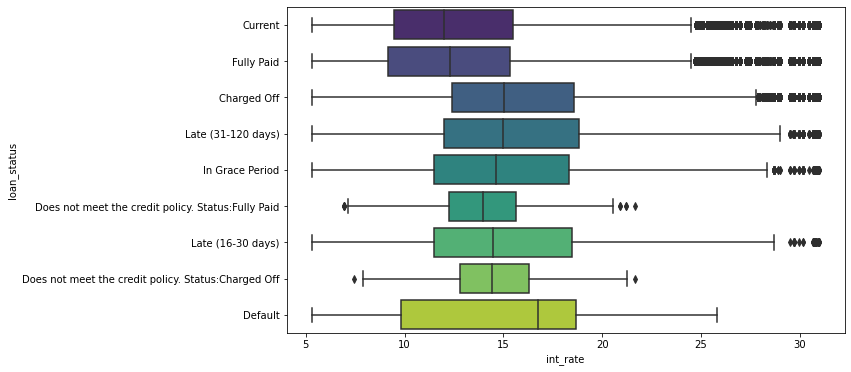

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(data=accepted, y='loan_status', x='int_rate', palette='viridis');

In [67]:
accepted['term'].value_counts()

 36 months    767703
 60 months    307651
Name: term, dtype: int64

<Figure size 720x864 with 0 Axes>

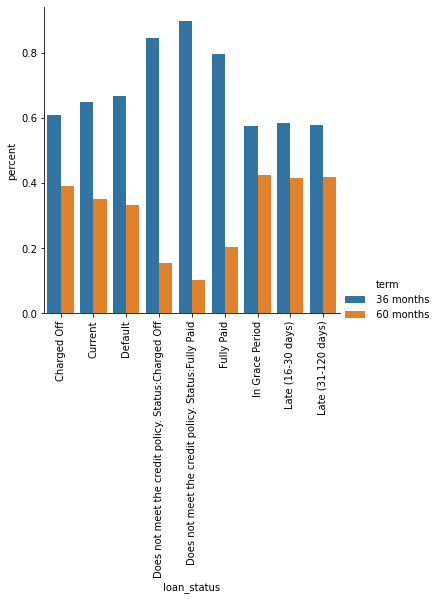

In [68]:

plt.figure(figsize=(10,12))
x,y = 'loan_status', 'term'

(accepted
.groupby(x)[y]
.value_counts(normalize=True)
# .mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=90);

### num_actv_bc_tl (number of currently active bankcard accounts)

In [69]:
accepted['num_actv_bc_tl'].describe()

count    1.041336e+06
mean     3.628750e+00
std      2.282335e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      4.500000e+01
Name: num_actv_bc_tl, dtype: float64

In [70]:
accepted.groupby('loan_status')['num_actv_bc_tl'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,485536.0,3.561835,2.185631,0.0,2.0,3.0,5.0,33.0
Current,414591.0,3.652648,2.367020,0.0,2.0,3.0,5.0,45.0
Charged Off,124910.0,3.804411,2.335896,0.0,2.0,3.0,5.0,30.0
Late (31-120 days),10228.0,3.681952,2.404251,0.0,2.0,3.0,5.0,22.0
In Grace Period,3972.0,3.643253,2.413421,0.0,2.0,3.0,5.0,20.0
Late (16-30 days),2087.0,3.646382,2.394968,0.0,2.0,3.0,5.0,18.0
Default,12.0,3.750000,2.340357,2.0,2.0,3.0,5.0,10.0
Does not meet the credit policy. Status:Charged Off,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Does not meet the credit policy. Status:Fully Paid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


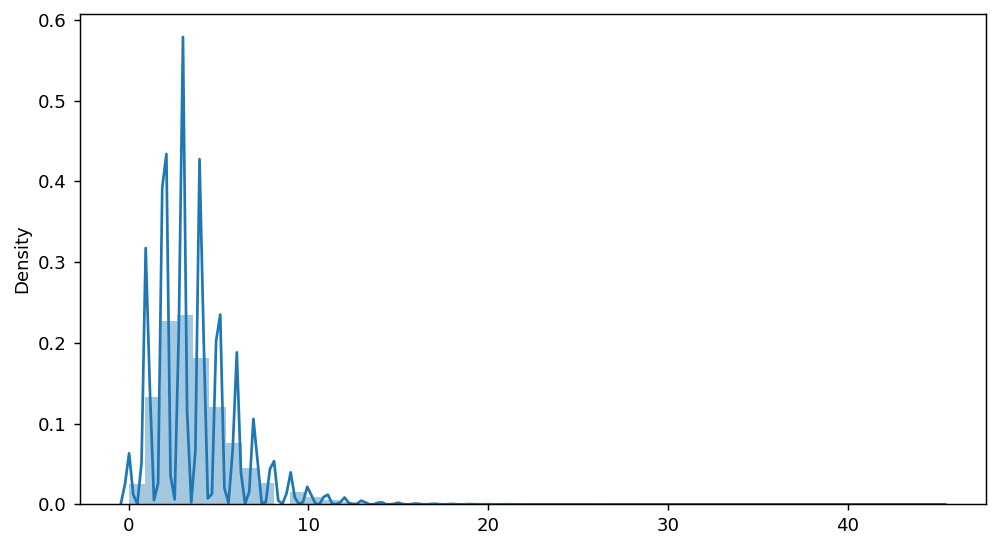

In [71]:
plt.figure(figsize=(9,5), dpi=130)
sns.distplot(x=accepted['num_actv_bc_tl']);

In [72]:
accepted['num_actv_bc_tl'].isnull().sum()

34018

#### range of this variable is between 0 and 45, with mean 3.6. Most of the values are near 4. We fill the missing values with the closest number to the mean of this variable.(4)

In [73]:
accepted['num_actv_bc_tl'].fillna(4, inplace=True)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


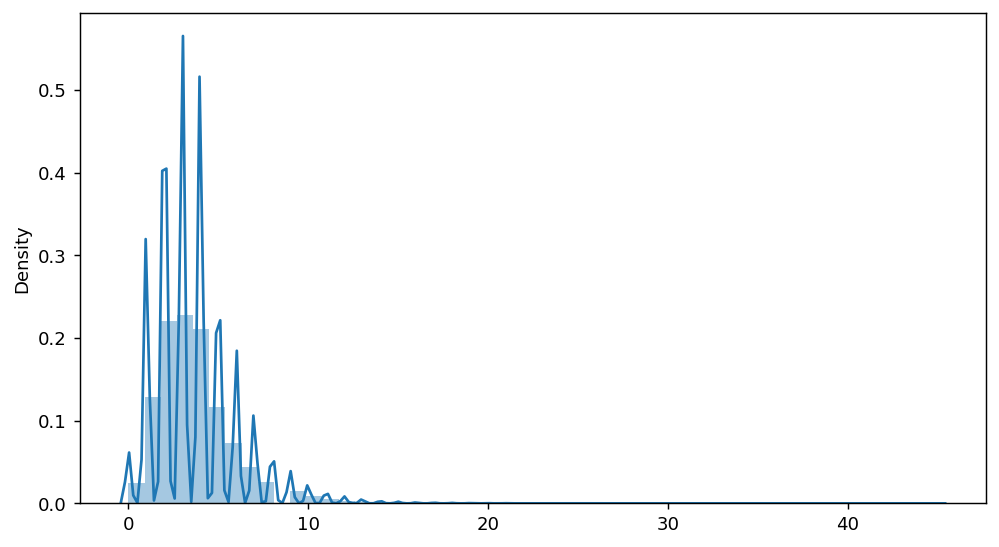

In [74]:
plt.figure(figsize=(9,5), dpi=130)
sns.distplot(x=accepted['num_actv_bc_tl']);

<AxesSubplot:xlabel='num_actv_bc_tl', ylabel='loan_status'>

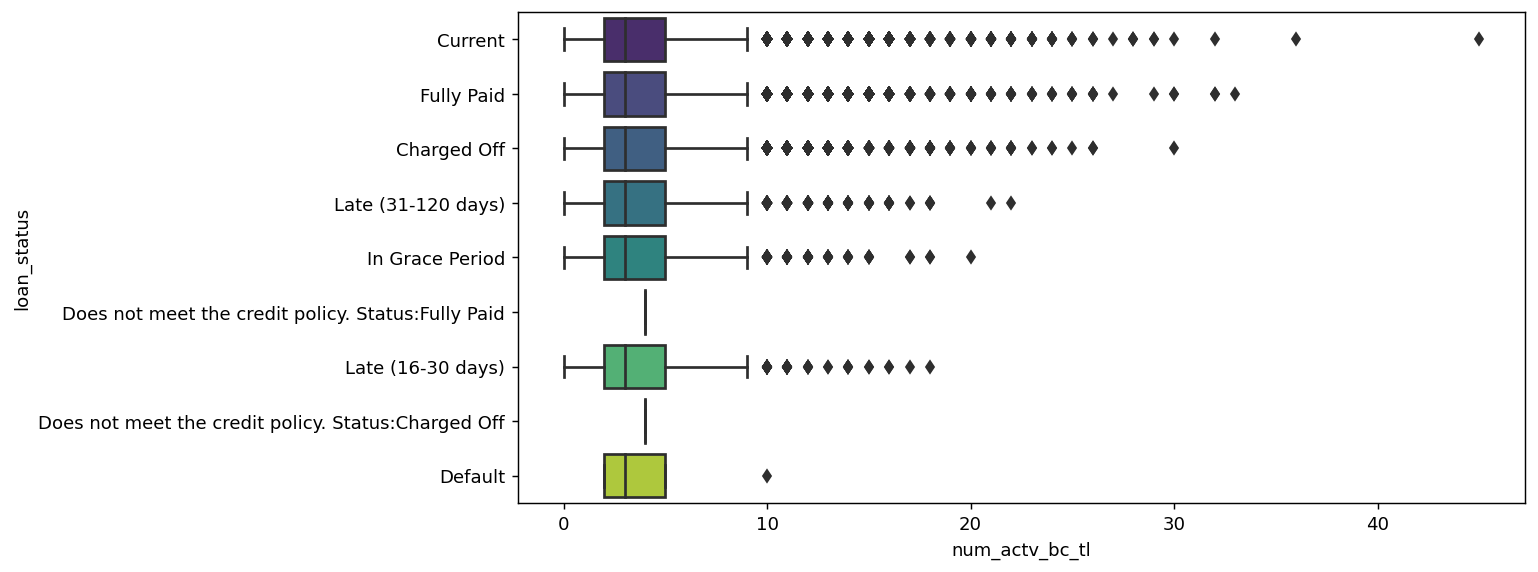

In [75]:
plt.figure(figsize=(10,5), dpi=130)
sns.boxplot(data=accepted, y='loan_status', x='num_actv_bc_tl', palette='viridis')

### total_acc(total number of credit lines currently in the borrower's credit file)



In [76]:
accepted['total_acc'].describe()

count    1.075338e+06
mean     2.384821e+01
std      1.184179e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.200000e+01
75%      3.000000e+01
max      1.730000e+02
Name: total_acc, dtype: float64

In [77]:
accepted.groupby('loan_status')['total_acc'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,513145.0,24.756774,11.840212,2.0,16.00,23.0,31.00,146.0
Current,414591.0,22.558483,11.666477,2.0,14.00,21.0,29.00,157.0
Charged Off,129985.0,24.511144,11.959887,2.0,16.00,23.0,31.00,173.0
Late (31-120 days),10228.0,22.986996,12.228957,2.0,14.00,21.0,30.00,148.0
In Grace Period,3972.0,23.111782,12.033136,2.0,15.00,21.0,29.25,84.0
Late (16-30 days),2087.0,22.340680,11.789151,2.0,14.00,20.0,29.00,95.0
Does not meet the credit policy. Status:Fully Paid,952.0,22.053571,13.631560,1.0,11.00,20.0,31.00,66.0
Does not meet the credit policy. Status:Charged Off,366.0,21.032787,13.839551,1.0,10.00,19.0,28.00,63.0
Default,12.0,18.166667,9.542568,6.0,12.25,15.0,23.50,36.0


<AxesSubplot:xlabel='total_acc', ylabel='loan_status'>

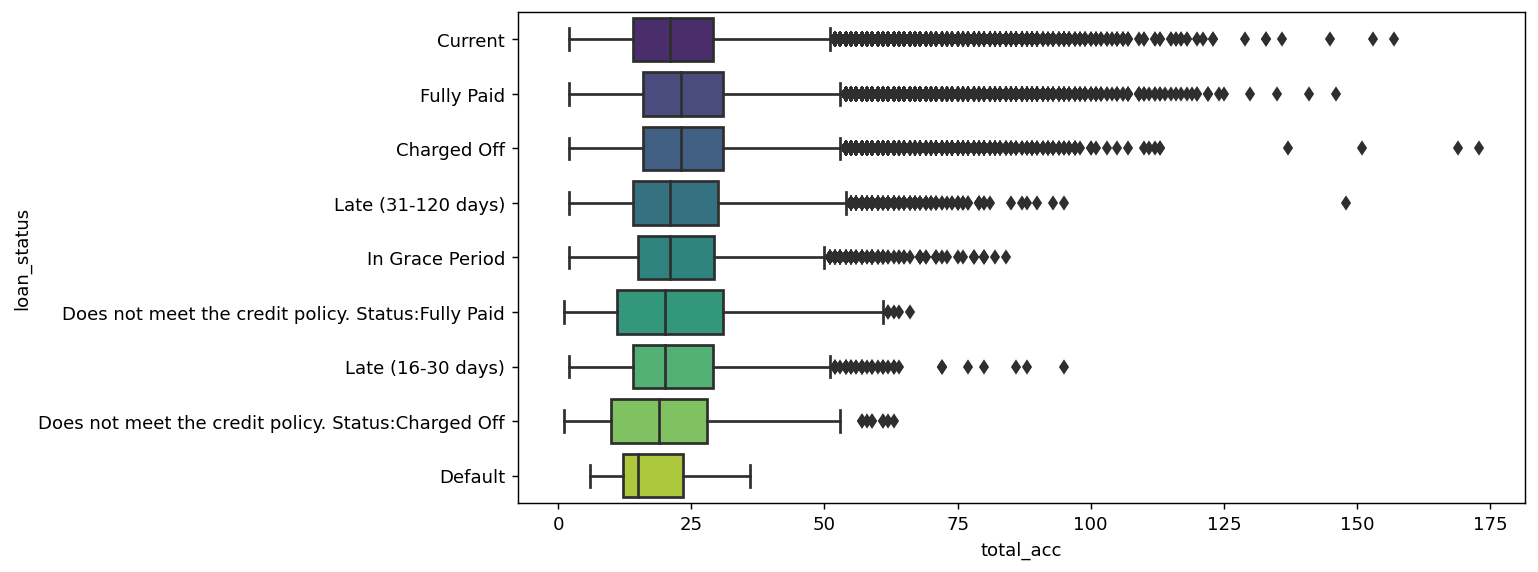

In [78]:
plt.figure(figsize=(10,5), dpi=130)
sns.boxplot(data=accepted, y='loan_status', x='total_acc', palette='viridis')

### tot_cur_bal(total current balance of all accounts)

In [79]:
tot_cur_bal_stats = accepted['tot_cur_bal'].describe()
tot_cur_bal_stats

count    1.041336e+06
mean     1.295710e+05
std      1.348084e+05
min      0.000000e+00
25%      2.797500e+04
50%      7.278200e+04
75%      2.002530e+05
max      2.757197e+06
Name: tot_cur_bal, dtype: float64

In [80]:
accepted.groupby('loan_status')['tot_cur_bal'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,485536.0,133836.713125,135752.880516,0.0,28920.75,80564.0,206781.25,2230255.0
Current,414591.0,130225.663119,137452.675980,0.0,27337.50,71205.0,202176.00,2757197.0
Charged Off,124910.0,111633.661973,119821.250691,0.0,26941.25,58826.5,167497.25,1429834.0
Late (31-120 days),10228.0,119248.955123,132477.565768,0.0,25311.75,58152.0,182404.00,1327066.0
In Grace Period,3972.0,136289.861027,145309.475202,0.0,28509.50,72767.0,211363.50,1224155.0
Late (16-30 days),2087.0,118625.193100,131706.548544,0.0,25155.50,60453.0,178191.50,815442.0
Default,12.0,107896.166667,105553.272368,12528.0,36971.50,65010.5,152311.50,302723.0
Does not meet the credit policy. Status:Charged Off,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Does not meet the credit policy. Status:Fully Paid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


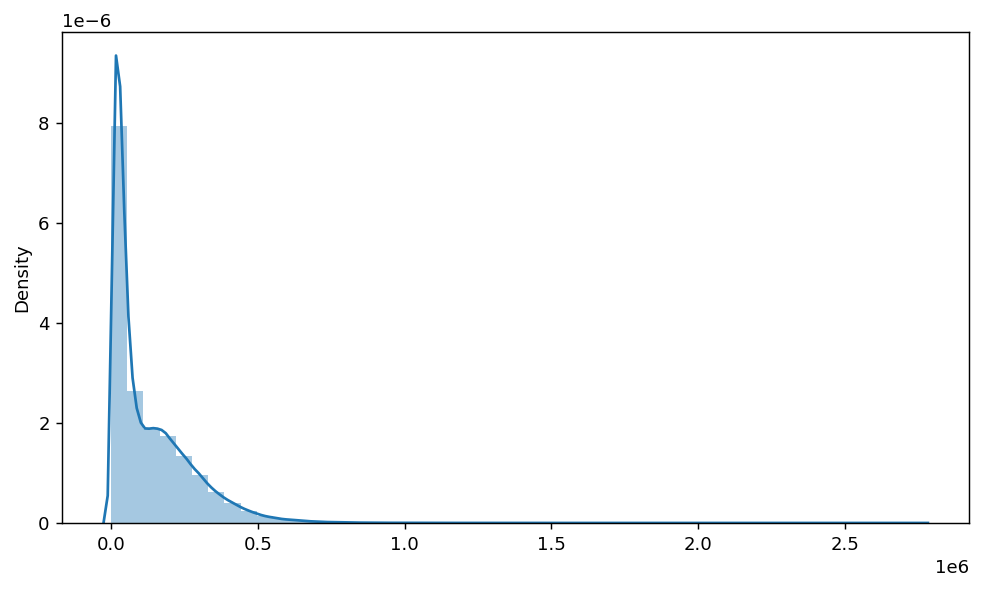

In [81]:
plt.figure(figsize=(9,5), dpi=130)
sns.distplot(x=accepted['tot_cur_bal']);

In [82]:
 tot_cur_bal_upper_bound = tot_cur_bal_stats['75%'] + 1.5*(tot_cur_bal_stats['75%'] - tot_cur_bal_stats['25%'])
tot_cur_bal_upper_bound

458670.0

In [83]:
accepted = accepted[accepted['tot_cur_bal'] < 1000000]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


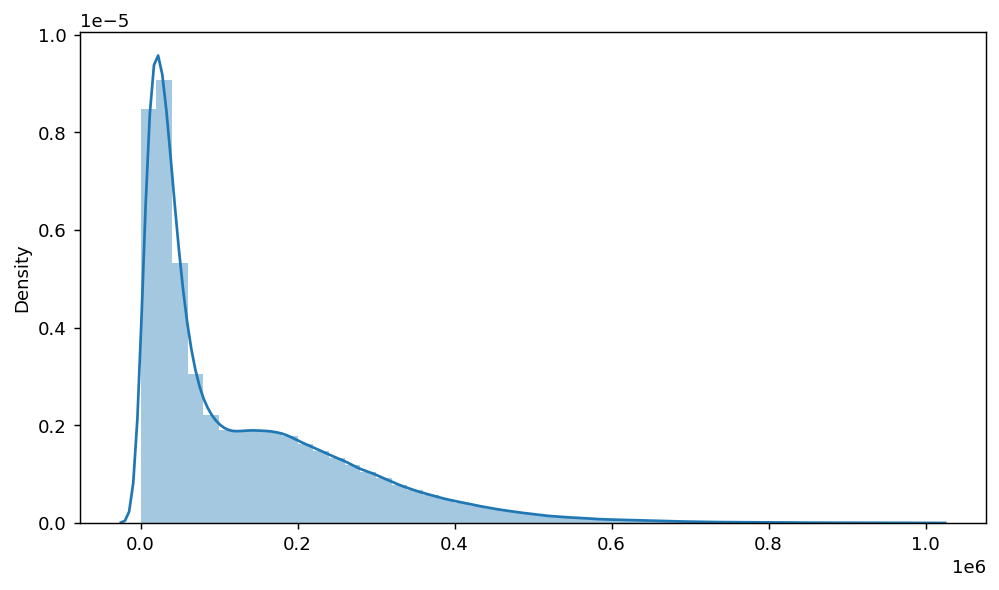

In [84]:
plt.figure(figsize=(9,5), dpi=130)
sns.distplot(x=accepted['tot_cur_bal']);

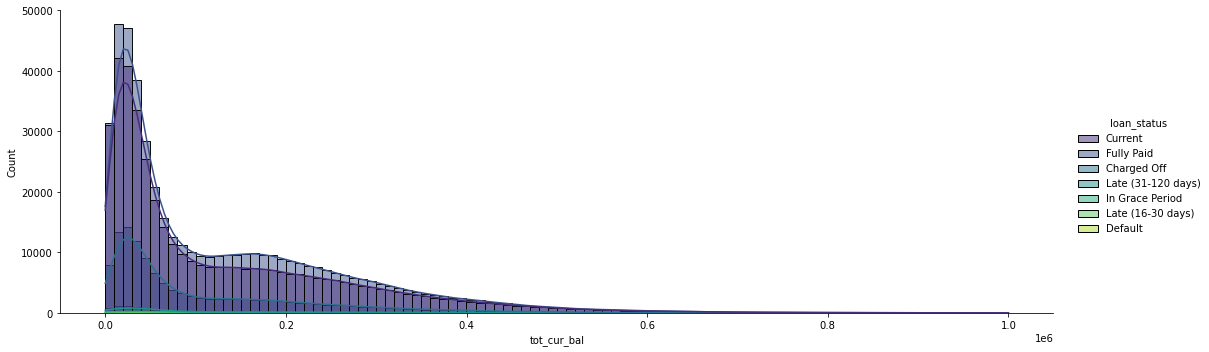

In [85]:
sns.displot(data=accepted, x='tot_cur_bal', hue='loan_status', bins=100, height=5, aspect=3, kde=True, palette='viridis');

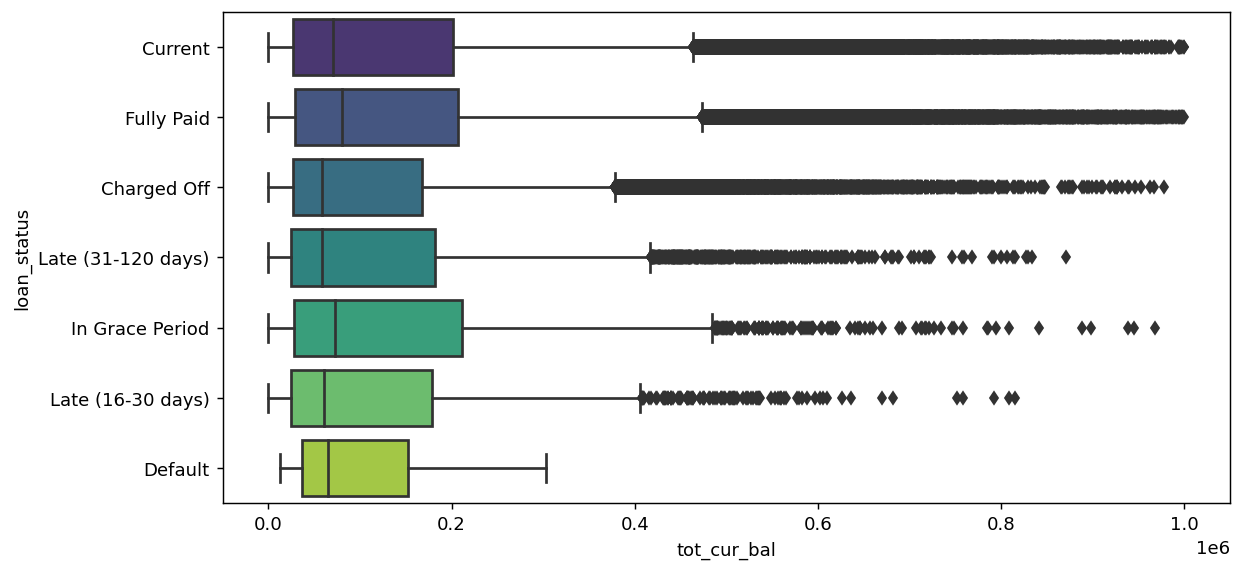

In [86]:
plt.figure(figsize=(10,5), dpi=130)
sns.boxplot(data=accepted, y='loan_status', x='tot_cur_bal', palette='viridis');

### purpose

In [87]:
accepted['purpose'].unique()

array(['credit_card', 'debt_consolidation', 'home_improvement', 'other',
       'major_purchase', 'small_business', 'vacation', 'moving',
       'medical', 'house', 'car', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [88]:
status_purpose_pcnt = accepted.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0).stack() / accepted.groupby(['purpose']).size()
status_purpose_pcnt

purpose  loan_status       
car      Charged Off           0.089752
         Current               0.413240
         Default               0.000095
         Fully Paid            0.482477
         In Grace Period       0.003514
                                 ...   
wedding  Default               0.000000
         Fully Paid            0.869767
         In Grace Period       0.000000
         Late (16-30 days)     0.000000
         Late (31-120 days)    0.000000
Length: 98, dtype: float64

/tmp/ipykernel_69/2068958922.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/7)][i%7].set_xticklabels(list(status_purpose_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/2068958922.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/7)][i%7].set_xticklabels(list(status_purpose_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/2068958922.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/7)][i%7].set_xticklabels(list(status_purpose_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/2068958922.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/7)][i%7].set_xticklabels(list(status_purpose_pcnt[feature].index), rotation=90)
/tmp/ipykernel_69/2068958922.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[int(i/7)][i%7].set_xticklabels(list(status_purpose_pcnt[feature].index), rotation

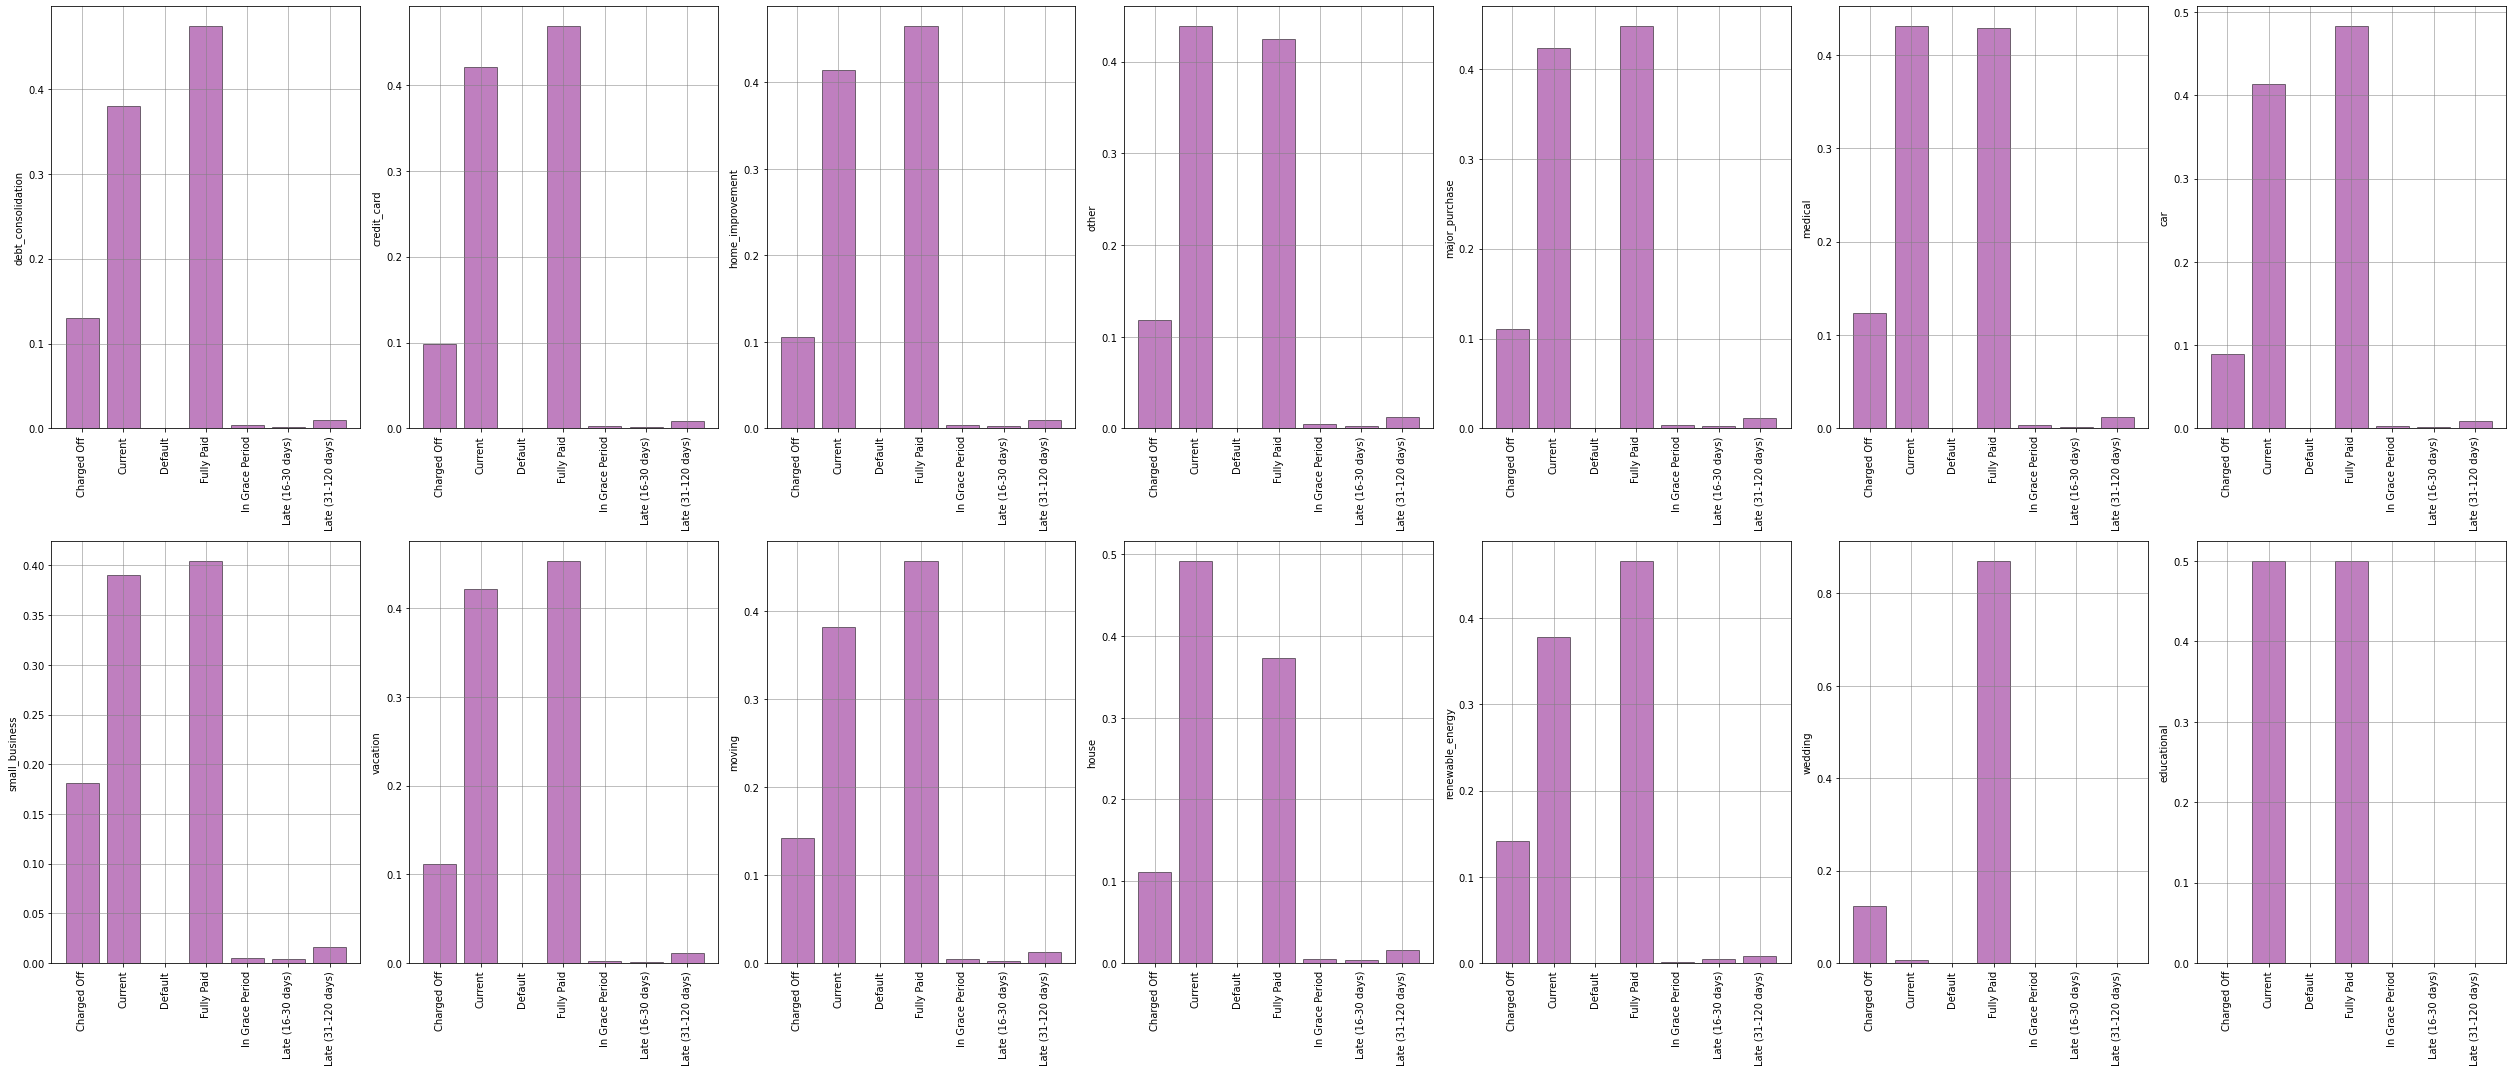

In [89]:
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(35, 15))
for i, feature in enumerate(list(accepted['purpose'].value_counts().index)):
    ax[int(i/7)][i%7].grid(True, linewidth=0.5, color='gray', linestyle='-')
    ax[int(i/7)][i%7].bar(list(status_purpose_pcnt[feature].index), status_purpose_pcnt[feature], align='center', alpha=0.5, edgecolor='black', color='purple')
    ax[int(i/7)][i%7].set_xticklabels(list(status_purpose_pcnt[feature].index), rotation=90)
    ax[int(i/7)][i%7].set_ylabel(feature)
fig.tight_layout()

### revol_util(Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)

In [90]:
tot_cur_bal_stats = accepted['revol_util'].describe()
tot_cur_bal_stats

count    1.040266e+06
mean     5.008322e+01
std      2.452399e+01
min      0.000000e+00
25%      3.140000e+01
50%      4.990000e+01
75%      6.890000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

In [91]:
accepted.groupby('loan_status')['revol_util'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,485099.0,50.984658,24.357668,0.0,32.600,51.0,69.700,892.3
Current,414072.0,47.688606,24.699641,0.0,28.500,46.8,66.400,191.0
Charged Off,124814.0,54.489339,23.649636,0.0,37.200,55.1,72.500,366.6
Late (31-120 days),10215.0,49.470700,24.971915,0.0,30.700,49.2,68.000,131.4
In Grace Period,3968.0,52.942591,24.907342,0.0,34.200,53.0,72.500,126.6
Late (16-30 days),2086.0,49.755129,25.437038,0.0,30.300,49.6,68.875,120.0
Default,12.0,41.950000,22.721096,9.3,23.625,43.2,55.100,86.3


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


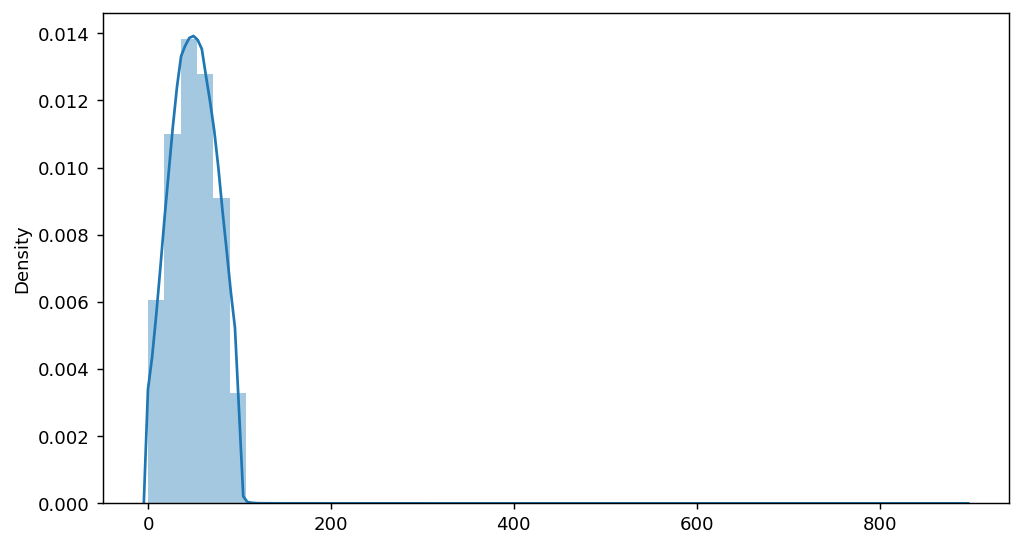

In [92]:
plt.figure(figsize=(9,5), dpi=130)
sns.distplot(x=accepted['revol_util']);

In [93]:
accepted = accepted[accepted['revol_util'] < 150]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


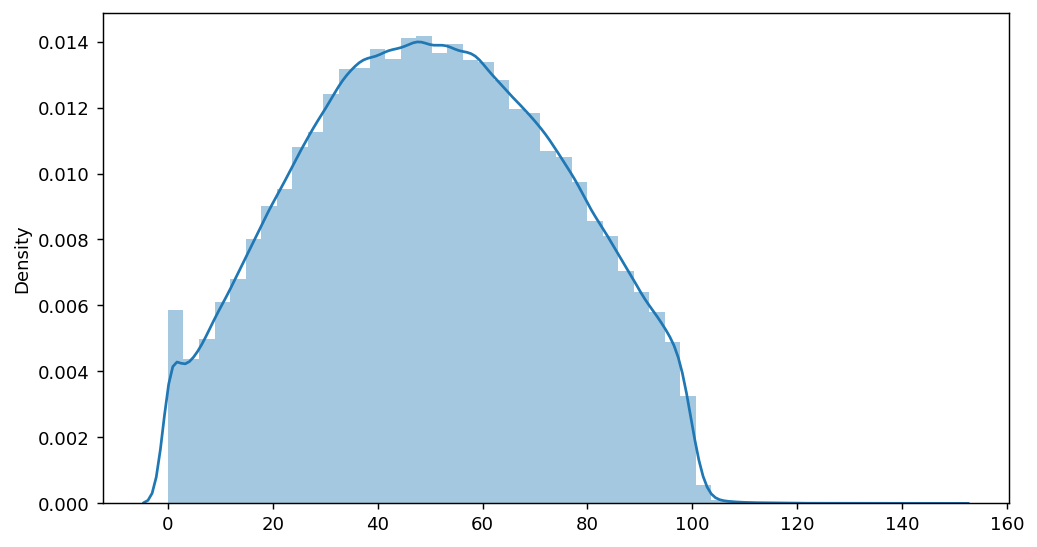

In [94]:
plt.figure(figsize=(9,5), dpi=130)
sns.distplot(x=accepted['revol_util']);

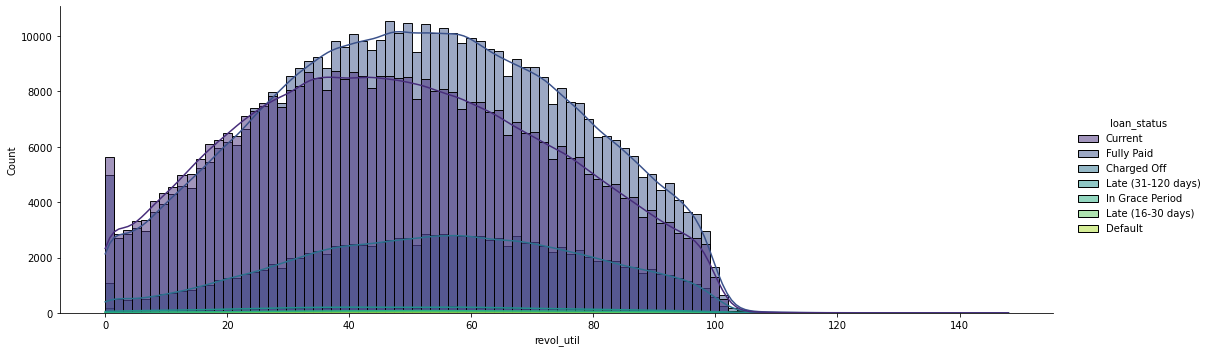

In [95]:
sns.displot(data=accepted, x='revol_util', hue='loan_status', bins=100, height=5, aspect=3, kde=True, palette='viridis');

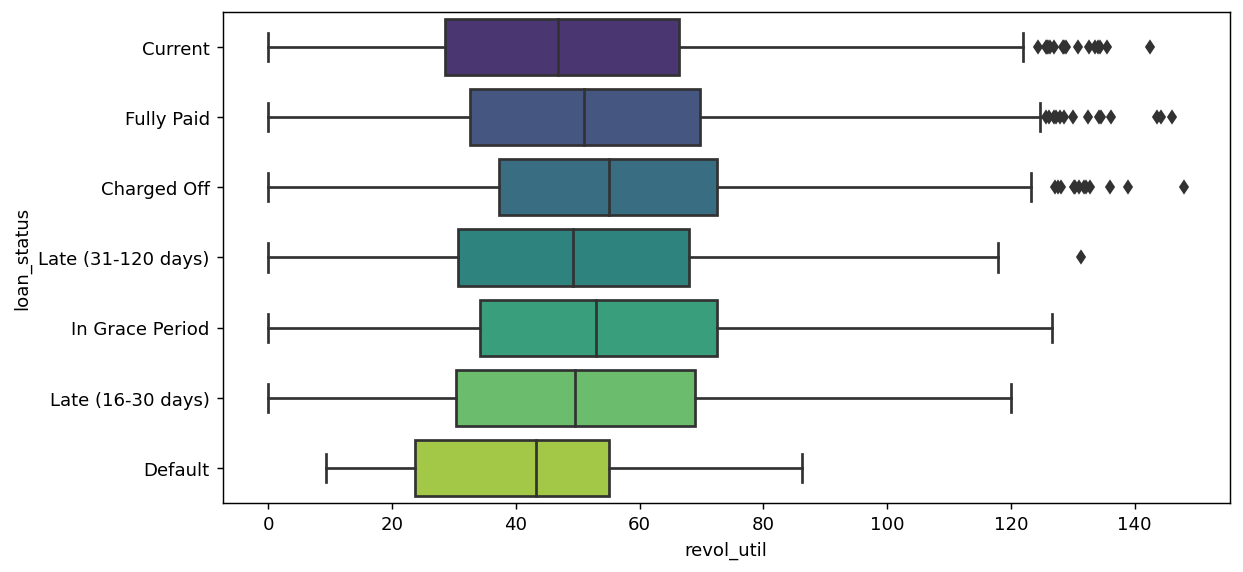

In [96]:
plt.figure(figsize=(10,5), dpi=130)
sns.boxplot(data=accepted, y='loan_status', x='revol_util', palette='viridis');

### total_pymnt

In [97]:
accepted['total_pymnt'].describe()

count    1.040252e+06
mean     1.170135e+04
std      9.600368e+03
min      0.000000e+00
25%      4.400417e+03
50%      9.046971e+03
75%      1.645504e+04
max      6.329688e+04
Name: total_pymnt, dtype: float64

In [98]:
accepted.groupby('loan_status')['total_pymnt'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,485094.0,16085.311749,10144.273680,1000.00,8374.435542,13574.359319,21913.551924,63296.877917
Current,414067.0,7726.106012,7311.045132,60.74,2592.455000,5290.390000,10434.895000,60510.600000
Charged Off,124810.0,8181.633908,6524.904978,0.00,3500.142500,6473.840000,10992.680000,56782.569821
Late (31-120 days),10215.0,8678.871620,7426.175158,0.00,3303.495000,6557.120000,11824.890000,55606.010000
In Grace Period,3968.0,10247.528852,8539.549721,132.00,3962.687500,7772.305000,14047.282500,54337.880000
Late (16-30 days),2086.0,9477.384249,8018.467954,76.54,3477.670000,7207.950000,13251.487500,54890.160000
Default,12.0,8778.574167,5643.088033,700.92,4509.760000,6983.615000,13531.095000,17715.100000


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


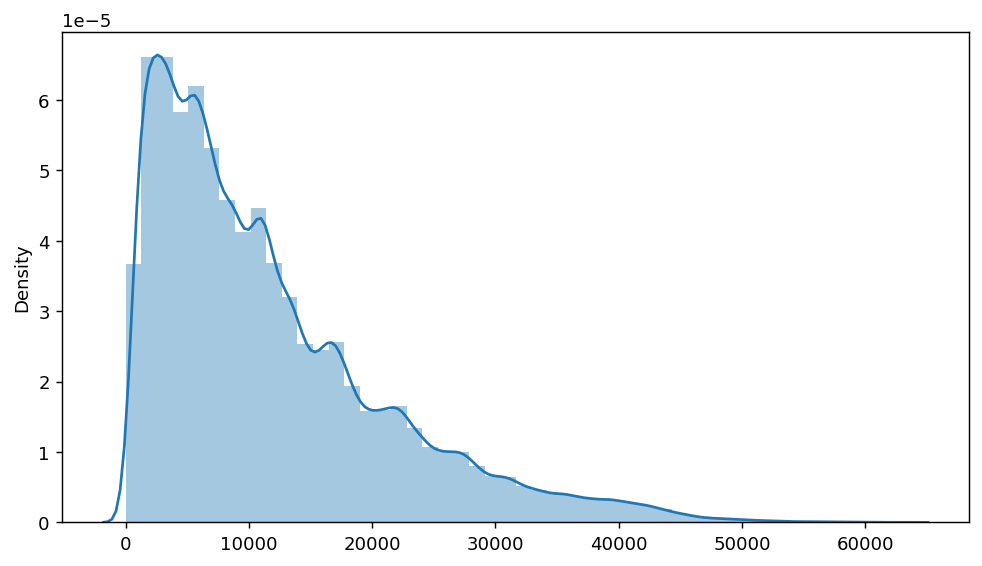

In [99]:
plt.figure(figsize=(9,5), dpi=130)
sns.distplot(x=accepted['total_pymnt']);

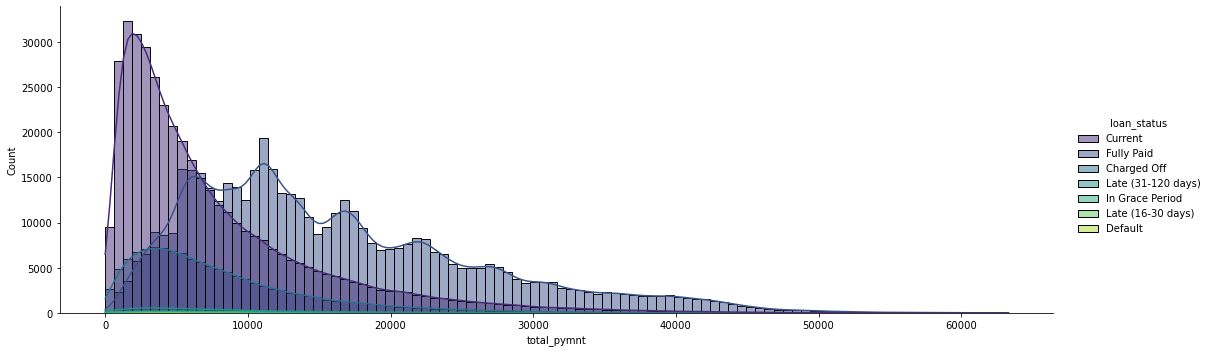

In [100]:
sns.displot(data=accepted, x='total_pymnt', hue='loan_status', bins=100, height=5, aspect=3, kde=True, palette='viridis');

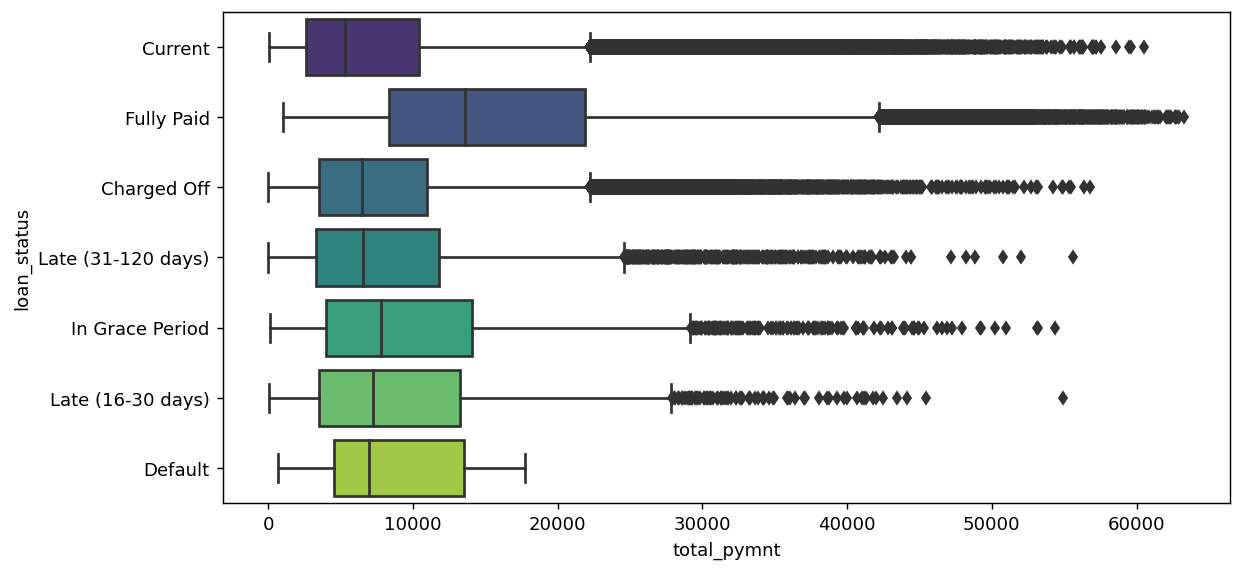

In [101]:
plt.figure(figsize=(10,5), dpi=130)
sns.boxplot(data=accepted, y='loan_status', x='total_pymnt', palette='viridis');

### installment(monthly payment owed by the borrower if the loan originates)

In [102]:
accepted['installment'].describe()

count    1.040252e+06
mean     4.345398e+02
std      2.572585e+02
min      4.930000e+00
25%      2.500700e+02
50%      3.716800e+02
75%      5.730600e+02
max      1.719830e+03
Name: installment, dtype: float64

In [103]:
accepted.groupby('loan_status')['installment'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,485094.0,422.168525,251.246993,4.93,240.8225,361.930,556.7800,1719.83
Current,414067.0,439.263830,262.735454,30.12,250.6600,371.680,581.4100,1714.54
Charged Off,124810.0,459.615116,255.865425,30.12,275.3300,399.900,595.0300,1715.42
Late (31-120 days),10215.0,485.894005,276.697108,31.09,281.9450,416.140,646.5850,1566.80
In Grace Period,3968.0,500.216663,277.089212,32.70,295.8450,439.210,659.4300,1544.87
Late (16-30 days),2086.0,496.739358,284.603564,7.61,289.5325,425.785,661.1025,1484.92
Default,12.0,481.225000,287.591061,50.45,304.1000,441.755,628.4750,1076.62


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


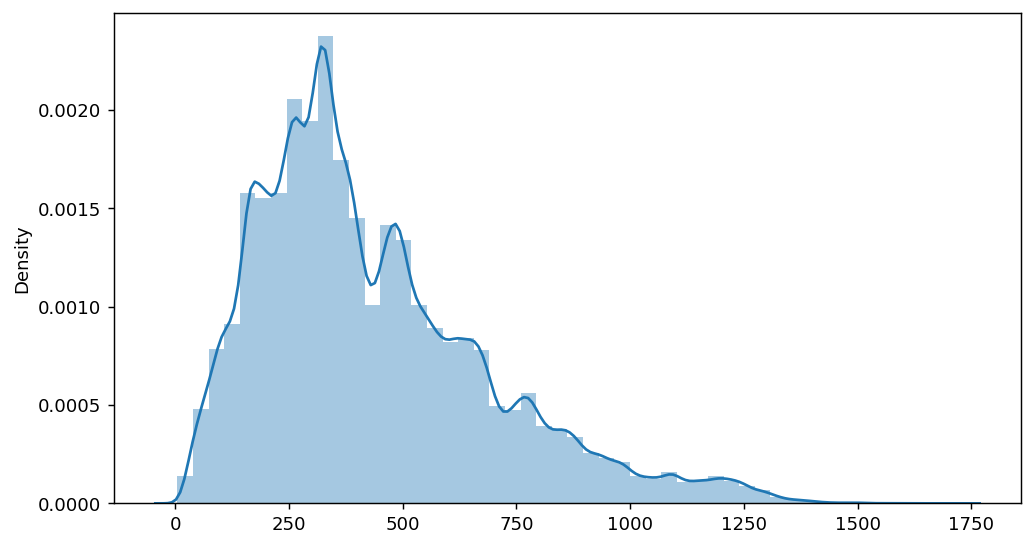

In [104]:
plt.figure(figsize=(9,5), dpi=130)
sns.distplot(x=accepted['installment']);

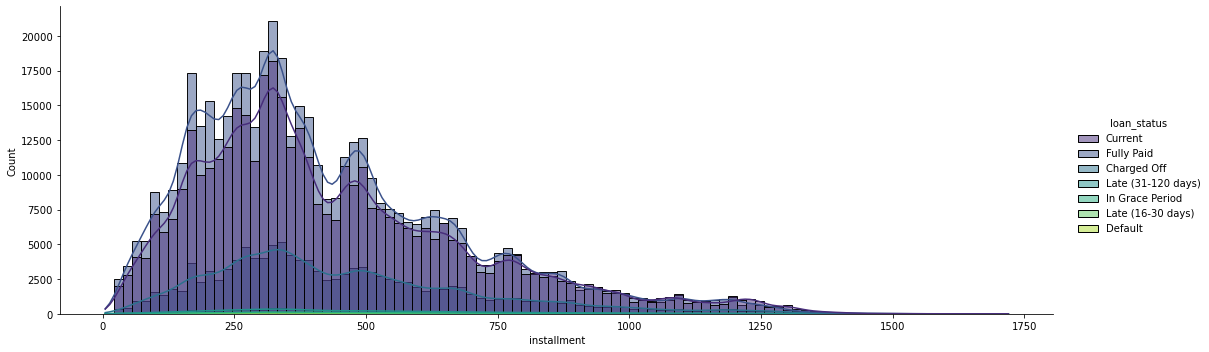

In [105]:
sns.displot(data=accepted, x='installment', hue='loan_status', bins=100, height=5, aspect=3, kde=True, palette='viridis');

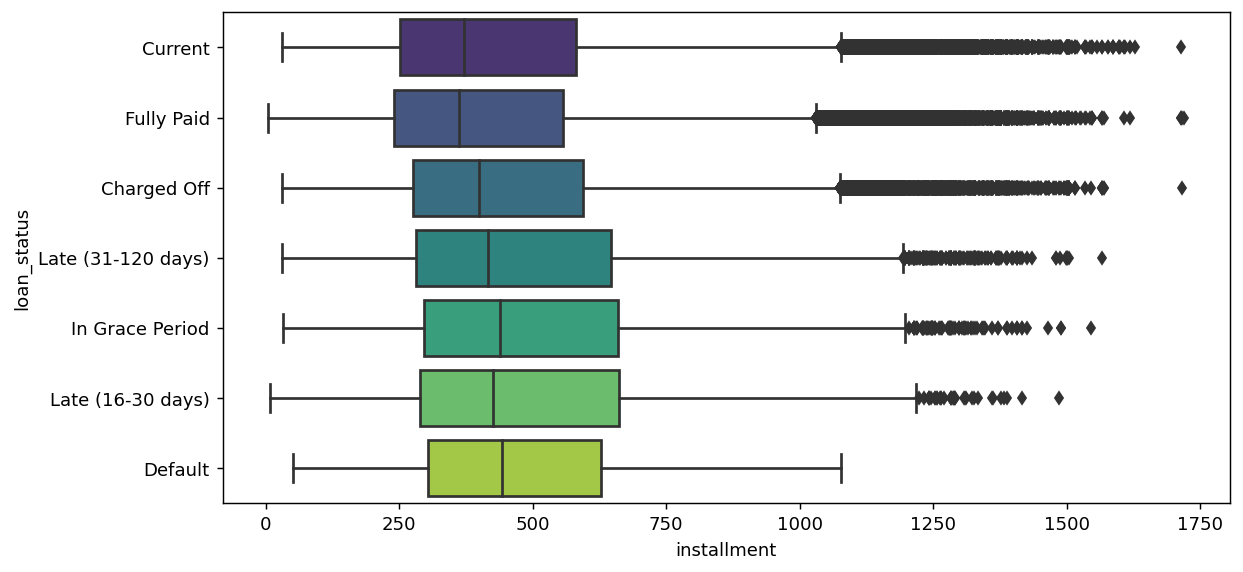

In [106]:
plt.figure(figsize=(10,5), dpi=130)
sns.boxplot(data=accepted, y='loan_status', x='installment', palette='viridis');

### loan_grade and loan_subgrade

In [107]:
accepted['grade'].value_counts()

C    304952
B    303886
A    191931
D    151811
E     63035
F     19133
G      5504
Name: grade, dtype: int64

In [108]:
accepted['sub_grade'].value_counts()

C1    67921
B5    64732
B4    64478
C2    61324
C3    60743
C4    59903
B3    59698
B2    58059
B1    56919
C5    55061
A5    48173
A4    42328
D1    38596
A1    37724
D2    34060
A3    32634
A2    31072
D3    30211
D4    26580
D5    22364
E1    15558
E2    13873
E3    12532
E4    10583
E5    10489
F1     6118
F2     4241
F3     3633
F4     2780
F5     2361
G1     1862
G2     1249
G3      952
G4      730
G5      711
Name: sub_grade, dtype: int64

In [109]:
accepted['loan_status'].value_counts()

Fully Paid            485094
Current               414067
Charged Off           124810
Late (31-120 days)     10215
In Grace Period         3968
Late (16-30 days)       2086
Default                   12
Name: loan_status, dtype: int64

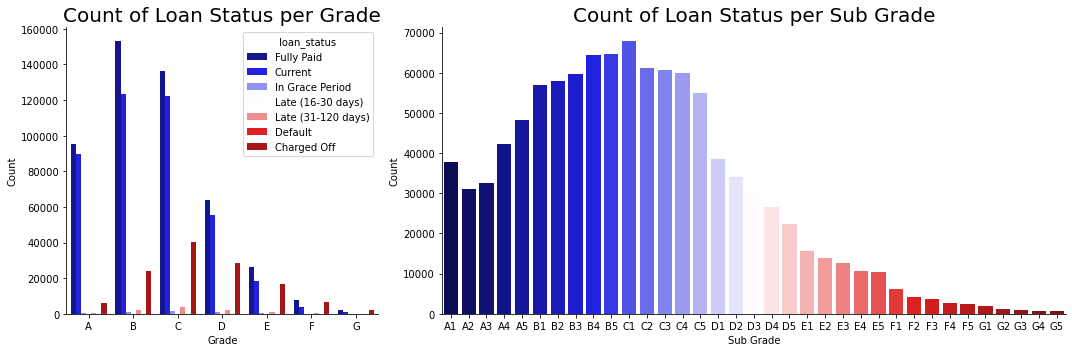

In [110]:
f, axes = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [1, 2]})
sns.countplot(x='grade', hue='loan_status', hue_order = ['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Default', 'Charged Off'], data=accepted, order=sorted(accepted['grade'].unique()), palette='seismic', ax=axes[0])
sns.countplot(x='sub_grade', data=accepted, palette='seismic', order=sorted(accepted['sub_grade'].unique()), ax=axes[1], hue_order = ['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Default', 'Charged Off'])
sns.despine()
axes[0].set(xlabel='Grade', ylabel='Count')
axes[0].set_title('Count of Loan Status per Grade', size=20)
axes[1].set(xlabel='Sub Grade', ylabel='Count')
axes[1].set_title('Count of Loan Status per Sub Grade', size=20)
plt.tight_layout()

Looks like Bad Loans are increasing as the letter grade gets higher.
Better grades are bluer and the worse grades are redder.
It looks like F and G subgrades don't get paid back that often

In [111]:
accepted['emp_title'].nunique()

267173

In [112]:
import string
accepted['emp_title'].fillna('', inplace=True)
accepted['emp_title'] = accepted['emp_title'].apply(lambda x: string.capwords(x))
accepted[accepted['emp_title'] == 'Rn'] = 'Registered Nurse'

In [113]:
accepted['emp_title'].nunique()

212986

### emp_title

In [114]:
accepted['emp_title'].value_counts()[1:21]

Teacher                     24064
Manager                     22021
Registered Nurse            19867
Owner                       15159
Driver                      10996
Supervisor                  10901
Sales                        8688
Office Manager               7135
Project Manager              6689
Truck Driver                 6233
General Manager              6094
Engineer                     4212
Operations Manager           3933
Director                     3853
Police Officer               3724
President                    3708
Technician                   3689
Sales Manager                3642
Administrative Assistant     3623
Nurse                        3556
Name: emp_title, dtype: int64

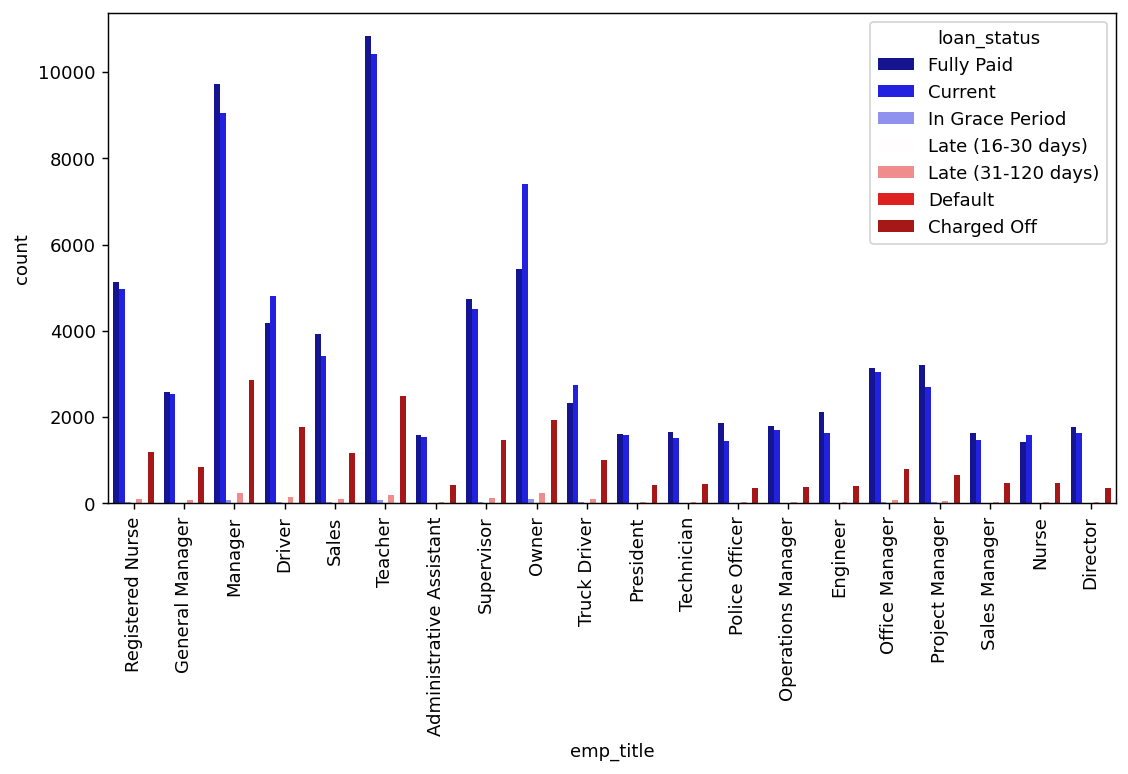

In [115]:
plt.figure(figsize=(10,5), dpi=130)
emp_acc = accepted[accepted['emp_title'].isin(accepted['emp_title'].value_counts()[1:21].index.values)]
sns.countplot(x='emp_title', hue='loan_status', hue_order = ['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Default', 'Charged Off'], data=emp_acc, palette='seismic')
plt.xticks(rotation=90);

### 